## Socialcops Challenge

<b>Working with <i>Monthly_data_cmo</i> dataset.</b>

#### 1. Import required packages

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

# Data wrangling
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import os

# pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style = 'ticks', context = 'poster')
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
# Print version of modules
def version(package_name: str, import_as):
    return ("{} version: {}".format(package_name, import_as.__version__))

In [3]:
print(version('Pandas', pd))
print(version('Numpy', np))
print(version('Seaborn', sns))

Pandas version: 0.23.4
Numpy version: 1.15.4
Seaborn version: 0.9.0


We have successfully imported all the required packages and libraries. Now, it's time to <i>load the dataset</i>.

#### 2. Load the dataset

The data we are going to work on is inside the <i>Monthly_data_cmo</i> csv file. You can find this file inside the <i>'data/'</i> folder. This dataset contains monthly data about the quantity arrival in market, minimum price, maximum price or average price of different commodities of APMC (Agricultural produce market committee).

The main attributes or features of the dataset are:
- <b>APMC: </b>Agricultural Produce Market Committee
- <b>Commodity</b>
- <b>Year</b>
- <b>Month</b>
- <b>arrivals_in_qtl: </b>Quantity arrival in market (in quintal)
- <b>min_price: </b>Minimum price charged per quintal
- <b>max_price: </b>Maximum price charged per quintal
- <b>modal_price: </b>Mode (Average)price charged per quintal
- <b>date</b>
- <b>district_name</b>
- <b>state_name</b>

In [4]:
# Get current working directory
def get_cwd():
    return os.getcwd()

# Read the dataset
def read_dataset(filename):
    dataset_path = os.chdir(get_cwd() + '\\data')
    data = os.path.join(get_cwd() , filename)
    return (pd.read_csv(data))

In [5]:
# Look at the 'cmo_yearly' dataset
cmo_monthly = read_dataset("Monthly_data_cmo.csv")
cmo_monthly.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


The above table shows us the top five observations of our dataset. We can also see the last five observations of our dataset using the ```tail``` method. Now, let's check out <i>how big our dataset is?</i> This we can know by using the ```shape``` method.

In [6]:
# Shape of the dataset
cmo_monthly.shape

(62429, 11)

The output return us a tuple which contains the number of observations that is ```62429``` and the number of attributes that is ```11```. We can also say it in this way that our dataset is having ```62429``` rows and ```11``` columns. Now, let's check out the datatypes of our attributes.

In [7]:
# Data types
cmo_monthly.dtypes

APMC               object
Commodity          object
Year                int64
Month              object
arrivals_in_qtl     int64
min_price           int64
max_price           int64
modal_price         int64
date               object
district_name      object
state_name         object
dtype: object

This shows us that we are having ```Year, arrivals_in_qtl, min_price, max_price and model_price``` in integer format and rest of the attribute values are having string format. Let's know more about our dataset using the ```describe``` method.

In [8]:
cmo_monthly.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.00000,62429.00000,62429.00000,62429.00000,62429.00000
mean,2015.33750,6043.08832,2945.22759,3688.81363,3296.00399
std,0.69045,34703.30743,13183.95573,7662.96247,3607.79253
min,2014.00000,1.00000,0.00000,0.00000,0.00000
25%,2015.00000,38.00000,1250.00000,1600.00000,1450.00000
50%,2015.00000,211.00000,1976.00000,2797.00000,2425.00000
75%,2016.00000,1364.00000,3900.00000,4647.00000,4257.00000
max,2016.00000,1450254.00000,3153038.00000,1600090.00000,142344.00000


The above table gives us a lot of knowledge about the dataset we are dealing with. Some useful parameter are such as ```mean, standard deviation, minimum, and maximum```.

The ```year``` attribute is in categorical format and rest of the attributes are having continuous values.

To simply list down the column names in the datset use ```columns``` method.

In [9]:
features = cmo_monthly.columns
features

Index(['APMC', 'Commodity', 'Year', 'Month', 'arrivals_in_qtl', 'min_price',
       'max_price', 'modal_price', 'date', 'district_name', 'state_name'],
      dtype='object')

#### 3. EDA

##### 3.1 state_name

As ```state_name``` attribute is having categorical data. So, firstly we need to check the total number of unique categorials available in our ```state_name``` attribute.

In [10]:
cmo_monthly.state_name.unique()

array(['Maharashtra'], dtype=object)

The output shows us that all the observations of our dataset is having same ```state_name``` that is ```Maharashtra```. It means our dataset only contains the observation belong to Maharashtra state. There is no importance of keeping this attribute in our further data visualization as it is having no effect on the values of our dataset. So we can simply remove it using the ```pop``` method.

In [11]:
# Remove state_name attribute
state_name = cmo_monthly.pop('state_name')
cmo_monthly.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar


Now, we are left with ten important attributes of our dataset. Let's look at other attributes of our dataset.

##### 3.2 district_name

As the ```district_name``` attribute is also in categorical form. So we can check out the total number of unique categories available in our ```district_name``` attribute.

In [12]:
print("Total number of unique categories available are {}.".format(
    len(cmo_monthly['district_name'].unique())))

Total number of unique categories available are 33.


In [13]:
# List down each of them with number of occurances of top five categories
cmo_monthly['district_name'].value_counts().sort_values(ascending = False).head()

Pune          6366
Ahmadnagar    4638
Nagpur        4527
Solapur       4524
Nasik         3620
Name: district_name, dtype: int64

<b>Result: </b>Most of our dataset belong to the above five districts. We can also show the result in the form of bar chart.

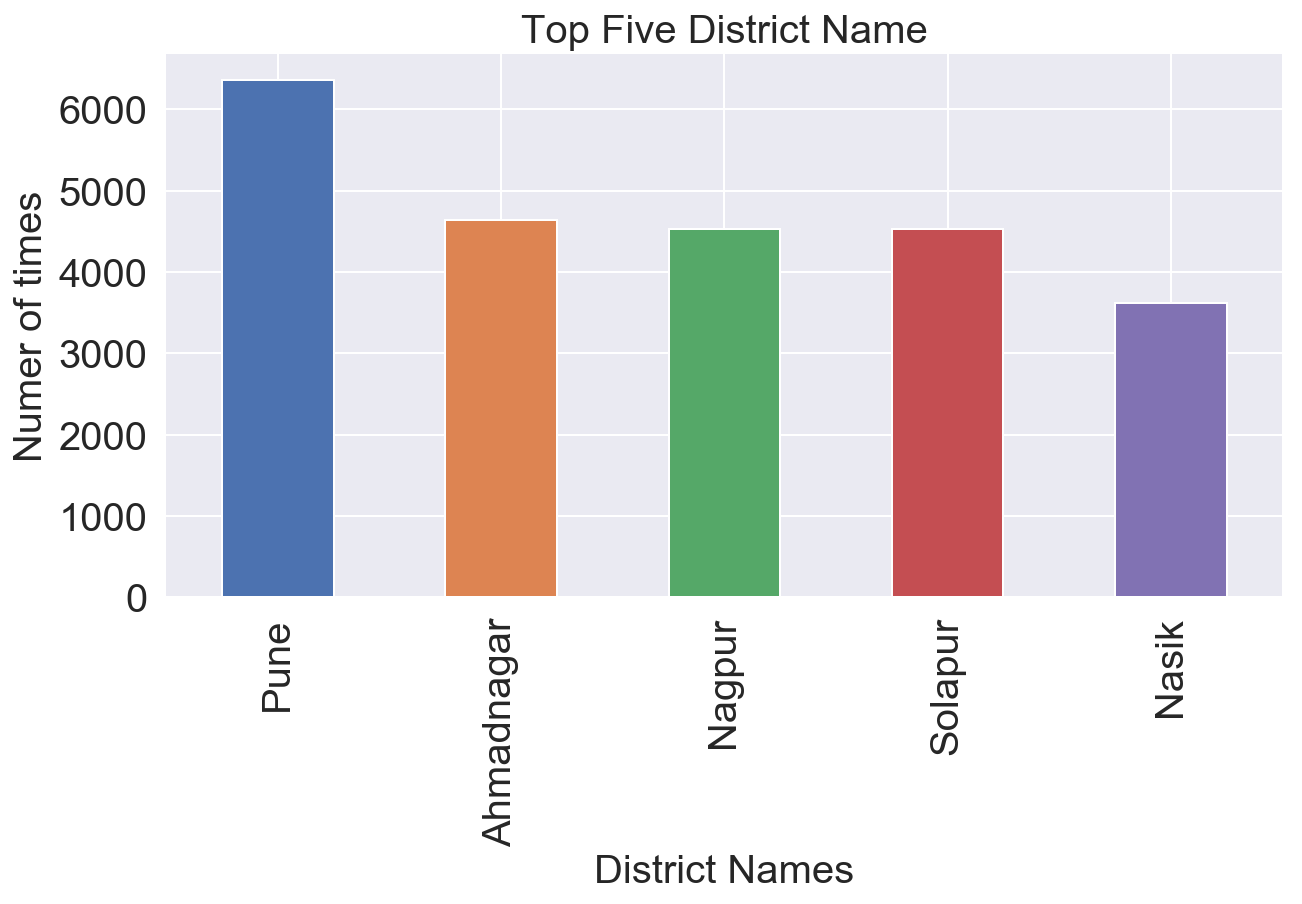

In [14]:
ax = cmo_monthly['district_name'].value_counts().sort_values(ascending = False).head().plot.bar(
    figsize=(10,5), fontsize=20)
ax.set_title("Top Five District Name", fontsize=20) 
ax.set_xlabel("District Names",fontsize=20)
ax.set_ylabel("Numer of times",fontsize=20)
sns.despine(bottom=True, left=True) 

In the similar manner we can also see the least number of times districts available in our dataset.

##### 3.3 date

Whenver, you are going to deal with the time series data, it's very important that we change our data to time series format. And this we can do using the ```to_datetime``` method.

In [15]:
# Change date attribute to date time
cmo_monthly['date'] = pd.to_datetime(cmo_monthly.date)
cmo_monthly.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar


Now you can see that the format of our dates have been changed.

##### 3.4 modal_price

Let's check out is there any null values present in our dataset.

In [16]:
cmo_monthly.isna().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
dtype: int64

It's good to see that we are having no missing values in our dataset.

In [17]:
# Check out modal_price
cmo_monthly['modal_price'].describe()

count    62429.00000
mean      3296.00399
std       3607.79253
min          0.00000
25%       1450.00000
50%       2425.00000
75%       4257.00000
max     142344.00000
Name: modal_price, dtype: float64

##### 3.5 max_price and min_price

With these attribute we can checkout the difference in max_price and min_price.

In [18]:
# Calculating the difference
def diff_price(max_price, min_price):
    return (max_price - min_price)

Let's create an attribute that contains the difference in price.

In [19]:
cmo_monthly['diff_price'] = cmo_monthly.max_price - cmo_monthly.min_price
cmo_monthly.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,132
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,137
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,318
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,470
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,600


Now, we can easily check when there is a large variation in the minimum price and maximum price.

In [20]:
# check out diff_price
cmo_monthly['diff_price'].describe()

count      62429.00000
mean         743.58604
std        14451.24215
min     -3149973.00000
25%          149.00000
50%          386.00000
75%          873.00000
max      1596090.00000
Name: diff_price, dtype: float64

##### 3.6 arrivals_in_qtl

In [21]:
# Check out quantity arrival data
cmo_monthly['arrivals_in_qtl'].describe()

count     62429.00000
mean       6043.08832
std       34703.30743
min           1.00000
25%          38.00000
50%         211.00000
75%        1364.00000
max     1450254.00000
Name: arrivals_in_qtl, dtype: float64

##### 3.7 Month

In [22]:
# Check out unique months
cmo_monthly['Month'].unique()

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

##### 3.8 Year

In [23]:
# check out unique years
cmo_monthly['Year'].unique()

array([2015, 2016, 2014], dtype=int64)

##### 3.9 Commodity

In [24]:
# Unique values of commodities
uniq_com = cmo_monthly['Commodity'].unique()
uniq_com

array(['Bajri', 'Wheat(Husked)', 'Sorgum(Jawar)', 'Maize', 'Gram',
       'Horse Gram', 'Matki', 'Pigeon Pea (Tur)', 'Black Gram',
       'Castor Seed', 'Soybean', 'Jaggery', 'Lemon', 'Ginger (Fresh)',
       'Potato', 'Ladies Finger', 'Flower', 'Carrot', 'Cluster Bean',
       'Ghevda', 'Ghosali(Bhaji)', 'Mango(Raw)', 'Cucumber', 'Onion',
       'Bitter Gourd', 'Cabbage', 'Garlic', 'Math (Bhaji)', 'Capsicum',
       'Tomato', 'Brinjal', 'Tamarind', 'Tamarind Seed',
       'Coriander (Dry)', 'Green Chilli', 'Chillies(Red)', 'Mustard',
       'Paddy-Unhusked', 'Hilda', 'Chikoo', 'Cotton',
       'Ground Nut Pods (Dry)', 'Pomegranate', 'Papai', 'Melon',
       'Beet Root', 'Bottle Gourd', 'Dhemse', 'Coriander ', 'Coriander  ',
       'Spinach', 'Shevga', 'Small Gourd', 'Grapes', 'Kharbuj',
       'Green Gram', 'Sunflower', 'Safflower', 'Mango', 'Water Melon',
       'Mosambi', 'Orange', 'Fenugreek', 'Cowpea', 'Green Peas (Dry)',
       'Squash Gourd', 'Maize (Corn.)', 'Chino', 'Curry Lea

In [25]:
print("There are total {} unique commodities available.".format(len(uniq_com)))

There are total 352 unique commodities available.


In [26]:
# Count the top five commodities
cmo_monthly['Commodity'].value_counts().sort_values(ascending = False).head()

Gram                3972
Wheat(Husked)       3946
Sorgum(Jawar)       3560
Soybean             3545
Pigeon Pea (Tur)    3389
Name: Commodity, dtype: int64

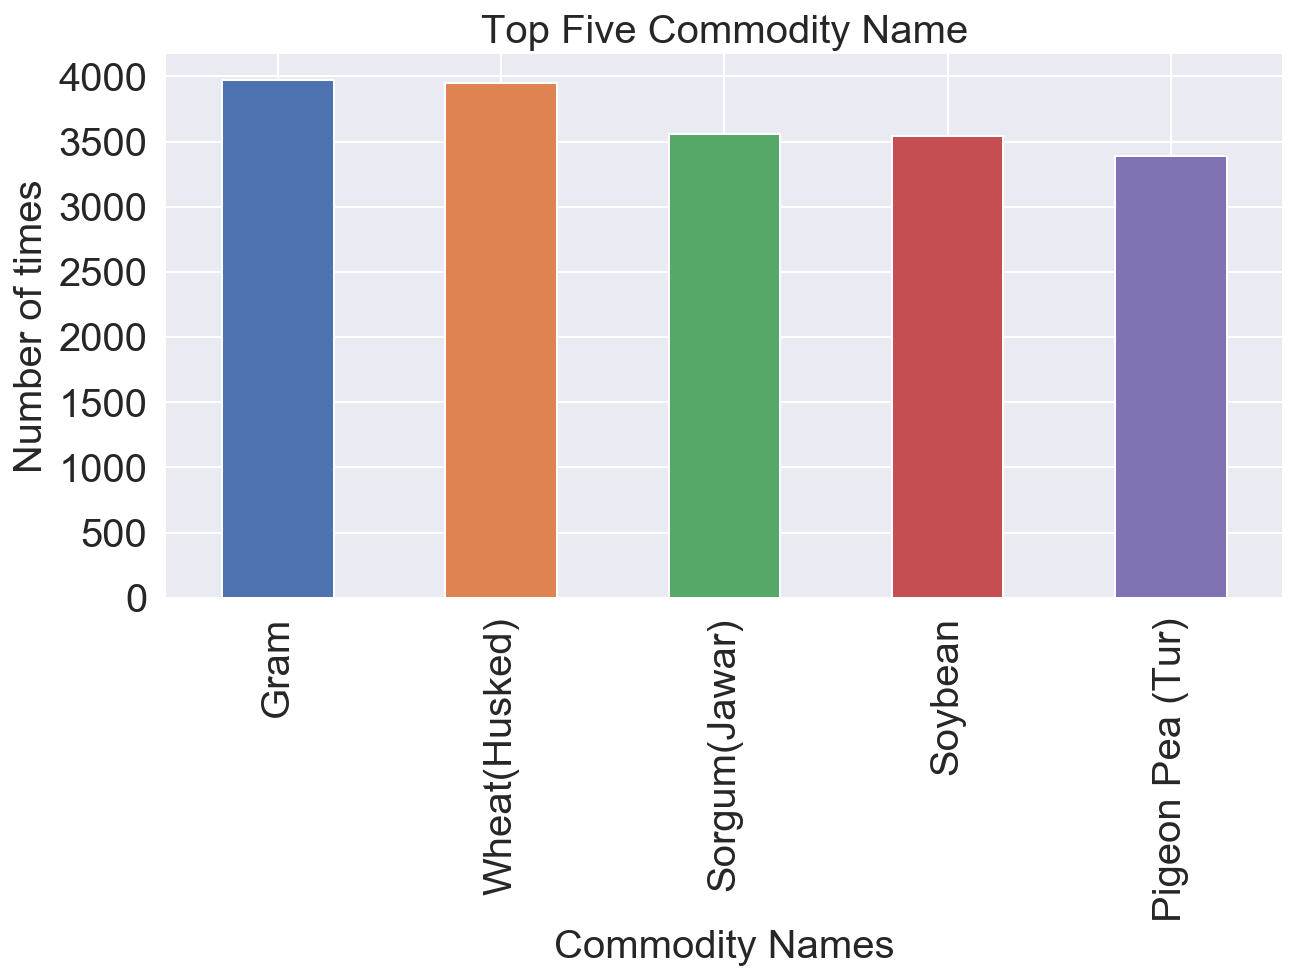

In [27]:
# Visualize 
ax = cmo_monthly['Commodity'].value_counts().sort_values(ascending = False).head().plot.bar(
    figsize=(10,5), fontsize=20)
ax.set_title("Top Five Commodity Name", fontsize=20) 
ax.set_xlabel("Commodity Names",fontsize=20)
ax.set_ylabel("Number of times",fontsize=20)
sns.despine(bottom=True, left=True) 

##### 3.10 APMC

In [28]:
# Unique values of APMC atttribute
uniq_apmc = cmo_monthly['APMC'].unique()
uniq_apmc

array(['Ahmednagar', 'Akole', 'Jamkhed', 'Kopargaon', 'Newasa',
       'Newasa-Ghodegaon', 'Parner', 'Pathardi', 'Rahata', 'Rahuri',
       'Rahuri-Vambori', 'Sangamner', 'Shevgaon', 'Shevgaon-Bodhegaon',
       'Shrirampur', 'Shrirampur-Belapur', 'Shrigonda',
       'Shrigonda-Ghogargaon', 'Karjat (A- Nagar)', 'Rahuri-Songaon',
       'Akola', 'Akot', 'Balapur', 'Murtizapur', 'Patur', 'Telhara',
       'Barshi Takli', 'Achalpur', 'Amarawati',
       'Amarawati-Fruit And Vegetables', 'Anajngaon Surji',
       'Chandur Bajar', 'Chandur Rly.', 'Daryapur', 'Dhamangaon-Rly',
       'Dharni', 'Morshi', 'Nandgaon Khandeshwar', 'Varud',
       'Varud-Rajura Bazar', 'Tiwasa', 'Aurangabad', 'Fulambri',
       'Gangapur', 'Kannad', 'Lasur Station', 'Paithan', 'Sillod',
       'Sillod-Bharadi', 'Soygaon', 'Vaijapur', 'Khultabad', 'Ambejogai',
       'Beed', 'Gevrai', 'Kada', 'Kada (Ashti)', 'Kej', 'Kille Dharur',
       'Majalgaon', 'Parli-Vaijnath', 'Bhandara', 'Lakhandur', 'Lakhani',
       'Pa

In [29]:
print("There are total {} unique APMC available.".format(len(uniq_apmc)))

There are total 349 unique APMC available.


In [30]:
# Count the top five APMC
cmo_monthly['APMC'].value_counts().sort_values(ascending = False).head()

Mumbai     1538
Pune       1513
Nagpur     1340
Barshi     1076
Jalgaon    1055
Name: APMC, dtype: int64

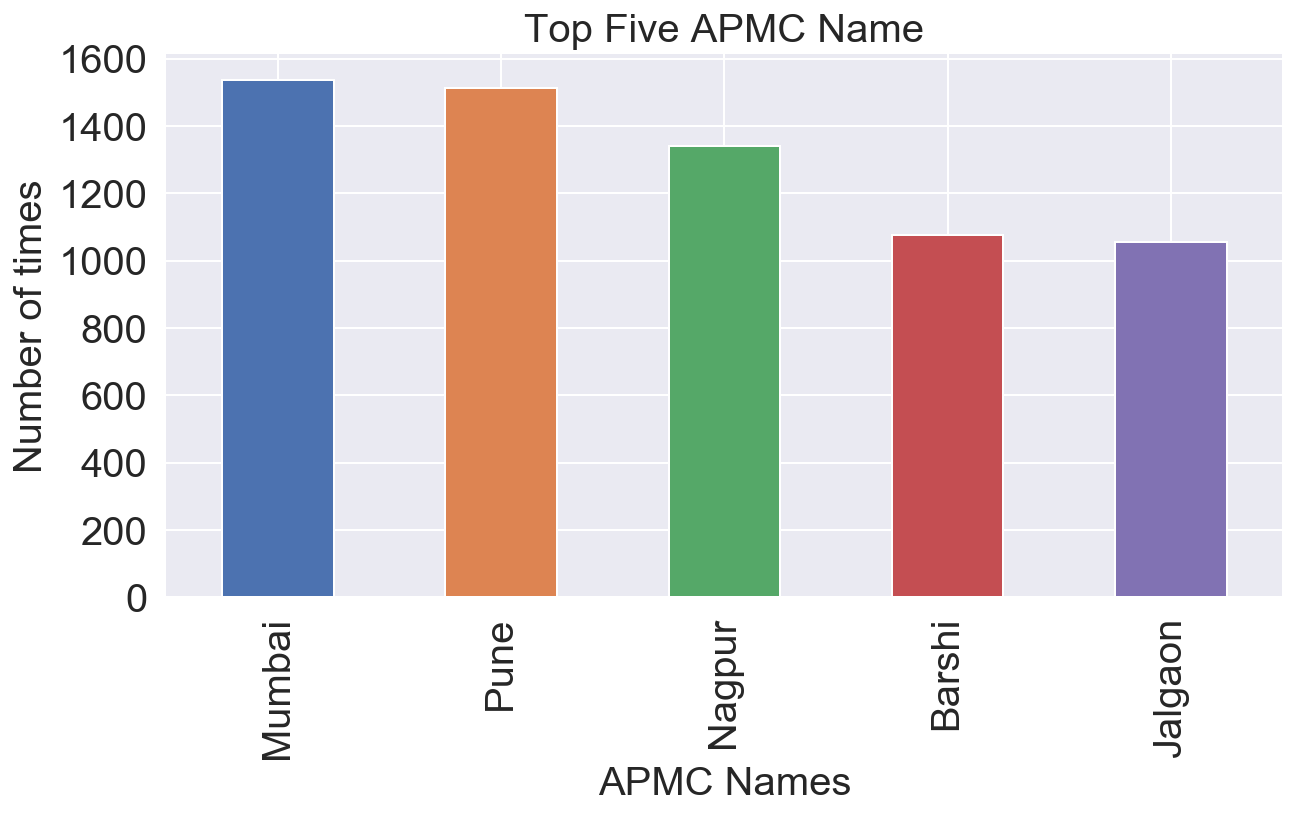

In [31]:
# Visualize 
ax = cmo_monthly['APMC'].value_counts().sort_values(ascending = False).head().plot.bar(
    figsize=(10,5), fontsize=20)
ax.set_title("Top Five APMC Name", fontsize=20) 
ax.set_xlabel("APMC Names",fontsize=20)
ax.set_ylabel("Number of times",fontsize=20)
sns.despine(bottom=True, left=True) 

We have seen each attribute personally. Let's dig deeper and group our data based of different ```APMC``` and ```Commodity``` attribute.

In [32]:
# Set APMC and Commodity attributes as the index
cmo_monthly.set_index(['APMC', 'Commodity'], inplace = True)
cmo_monthly.head()

Year  Month  arrivals_in_qtl  min_price  max_price  \
APMC       Commodity                                                           
Ahmednagar Bajri          2015  April               79       1406       1538   
           Bajri          2016  April              106       1788       1925   
           Wheat(Husked)  2015  April             1253       1572       1890   
           Wheat(Husked)  2016  April              387       1750       2220   
           Sorgum(Jawar)  2015  April             3825       1600       2200   

                          modal_price       date district_name  diff_price  
APMC       Commodity                                                        
Ahmednagar Bajri                 1463 2015-04-01    Ahmadnagar         132  
           Bajri                 1875 2016-04-01    Ahmadnagar         137  
           Wheat(Husked)         1731 2015-04-01    Ahmadnagar         318  
           Wheat(Husked)         1999 2016-04-01    Ahmadnagar         470  
           Sorgum(Jawar)         1900 2015-04-01    Ahmadnagar         600

Now, our data is grouped according to different ```APMC``` and ```Commodity``` attribute. Let's see the commodities of Top five APMC that we have seen above - <i>Mumbai, Pune, Nagpur, Barshi, Jalgaon</i>.

##### 4. Mumbai

In [33]:
# Look for APMC: Mumbai
mumbai = cmo_monthly.loc['Mumbai']
mumbai.head()

,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
Commodity,,,,,,,,,
Rice(Paddy-Hus),2015,April,495108,4754,8250,6377,2015-04-01,Mumbai,3496
Rice(Paddy-Hus),2016,April,563098,4187,6951,5586,2016-04-01,Mumbai,2764
Cowpea,2015,April,8295,4583,6583,5565,2015-04-01,Mumbai,2000
Cowpea,2016,April,15000,4757,6991,5876,2016-04-01,Mumbai,2234
Split Gram,2015,April,24996,3717,4317,3917,2015-04-01,Mumbai,600


In [34]:
# Check out the shape of the 'mumbai' dataframe
mumbai.shape

(1538, 9)

The result shows us the same number of observations ```1538``` that we have calculated above through ```value_counts``` method. It means we are going in the right path.

Let's check out the Top Commodities of ```Mumbai - APMC```.

In [35]:
mumbai.index.unique()

Index(['Rice(Paddy-Hus)', 'Cowpea', 'Split Gram', 'Horse Gram', 'Split Lentil',
       'Spilt Gerrn Gram', 'Spilt Pigeon Pea', 'Split Black Gram',
       'Green Peas (Dry)', 'Fennel',
       ...
       'GINGER (DRY)', 'TAMARIND', 'CORIANDER (DRY)', 'TURMERIC', 'CUMMIN',
       'CASHEWNUTS', 'GREEN CHILLI', 'CHILLIES(RED)', 'BETELNUTS', 'CARDAMOM'],
      dtype='object', name='Commodity', length=117)

The length parameter return us ```117```. It means we are having 117 unique commodities in our ```Mumbai APMC``` dataset. Now, let's see top five commodities.

In [36]:
mumbai.index.value_counts().sort_values(ascending = False).head()

Sweet Potato        26
Turmeric            26
Elephant Root       26
Jaggery             26
Spilt Pigeon Pea    26
Name: Commodity, dtype: int64

We get the Top Five commodities as - ```Arvi, Cabbage, Spilt Gerrn Gram, Split Gram, Split Lentil```. Let's dig dipper into each of these commodities.

- <b>Cabbage</b>

In [37]:
cabbage_mumbai = mumbai.loc['Cabbage']
cabbage_mumbai.head()

,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
Commodity,,,,,,,,,
Cabbage,2015,April,38980,362,623,492,2015-04-01,Mumbai,261
Cabbage,2016,April,30990,446,638,542,2016-04-01,Mumbai,192
Cabbage,2015,August,37770,604,774,696,2015-08-01,Mumbai,170
Cabbage,2016,August,61000,892,1181,1035,2016-08-01,Mumbai,289
Cabbage,2014,December,45830,707,926,817,2014-12-01,Mumbai,219


Now, we extracted the Cabbage commodity from out Mumbai dataframe.

In [38]:
# Check out it's shape
cabbage_mumbai.shape

(26, 9)

This return that we are having ```26``` observations and ```7``` attributes.

In [39]:
# sort by date attribute
cabbage_mumbai = cabbage_mumbai.sort_values(by = ['date'])
cabbage_mumbai.head()

,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
Commodity,,,,,,,,,
Cabbage,2014,September,58220,824,1224,1024,2014-09-01,Mumbai,400
Cabbage,2014,October,49170,736,944,840,2014-10-01,Mumbai,208
Cabbage,2014,November,46690,488,664,576,2014-11-01,Mumbai,176
Cabbage,2014,December,45830,707,926,817,2014-12-01,Mumbai,219
Cabbage,2015,January,42370,1015,1378,1196,2015-01-01,Mumbai,363


Our data is sorted according to date. Now, set the date attribute as the index.

In [40]:
# Set index as data attribute
cabbage_mumbai.set_index('date', inplace = True)
cabbage_mumbai

,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,diff_price
date,,,,,,,,
2014-09-01,2014,September,58220,824,1224,1024,Mumbai,400
2014-10-01,2014,October,49170,736,944,840,Mumbai,208
2014-11-01,2014,November,46690,488,664,576,Mumbai,176
2014-12-01,2014,December,45830,707,926,817,Mumbai,219
2015-01-01,2015,January,42370,1015,1378,1196,Mumbai,363
2015-02-01,2015,February,40840,1108,1508,1308,Mumbai,400
2015-03-01,2015,March,41220,752,1048,900,Mumbai,296
2015-04-01,2015,April,38980,362,623,492,Mumbai,261
2015-05-01,2015,May,35180,524,756,640,Mumbai,232


Now, it's time to plot the trend in our ```Cabbage Commodity of Mumbai APMC```.

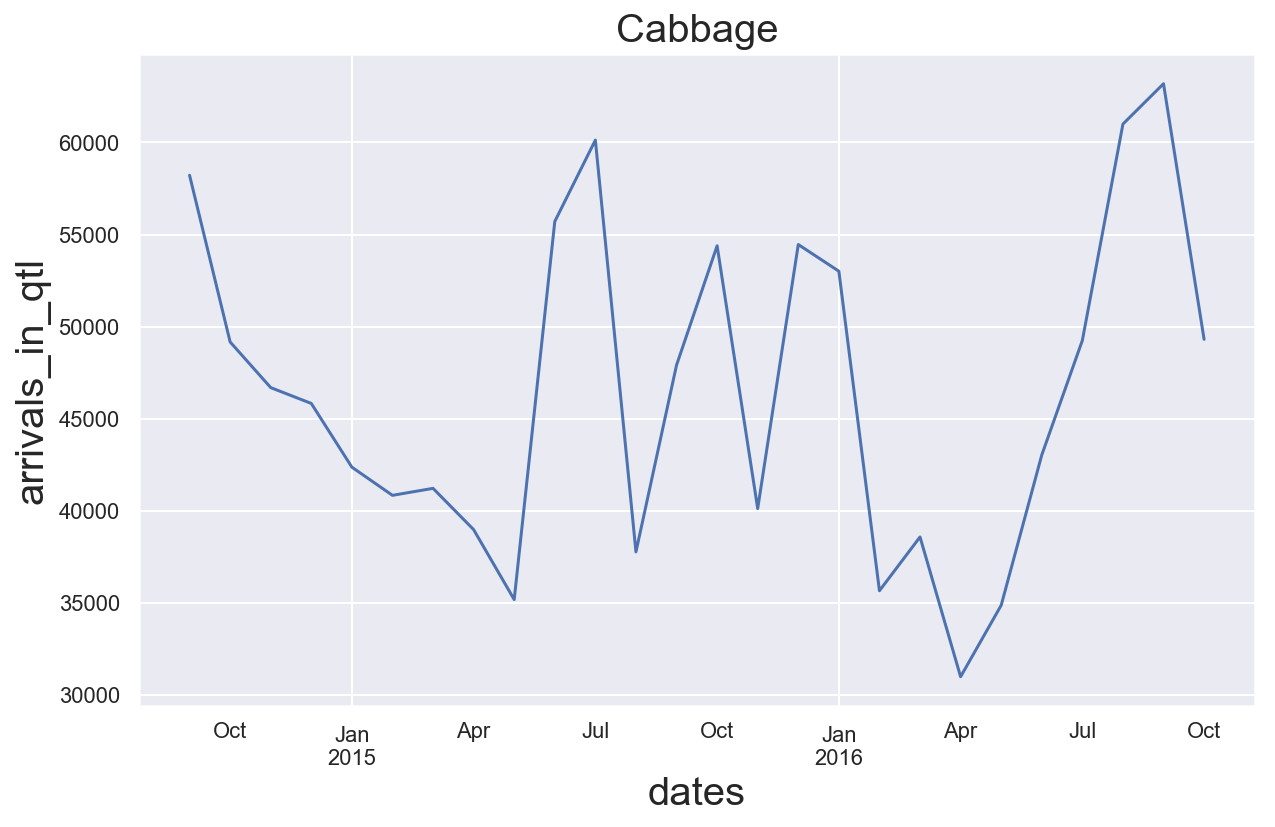

In [41]:
# Plot the trend
ax = cabbage_mumbai['arrivals_in_qtl'].plot()
ax.set_title("Cabbage", fontsize=20)
ax.set_xlabel("dates", fontsize=20)
ax.set_ylabel("arrivals_in_qtl", fontsize=20)


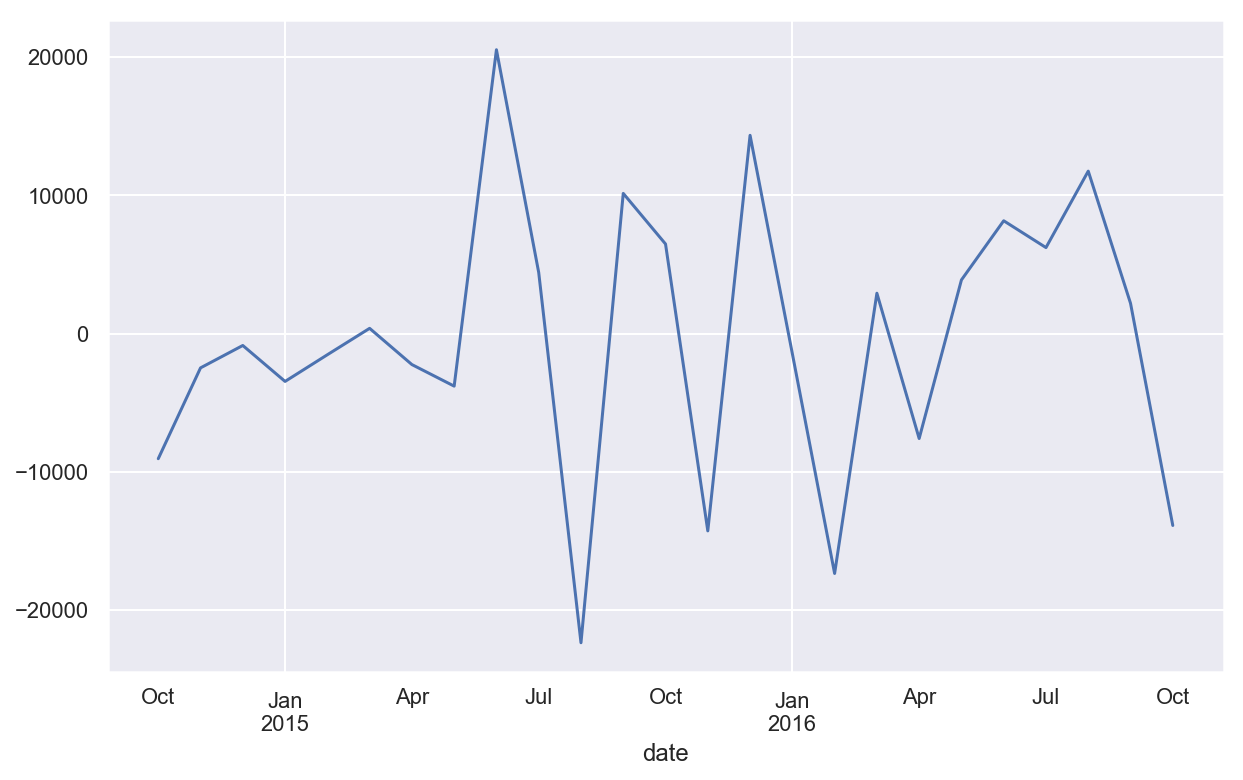

In [42]:
# Seasonality
cabbage_mumbai['arrivals_in_qtl'].diff().plot()

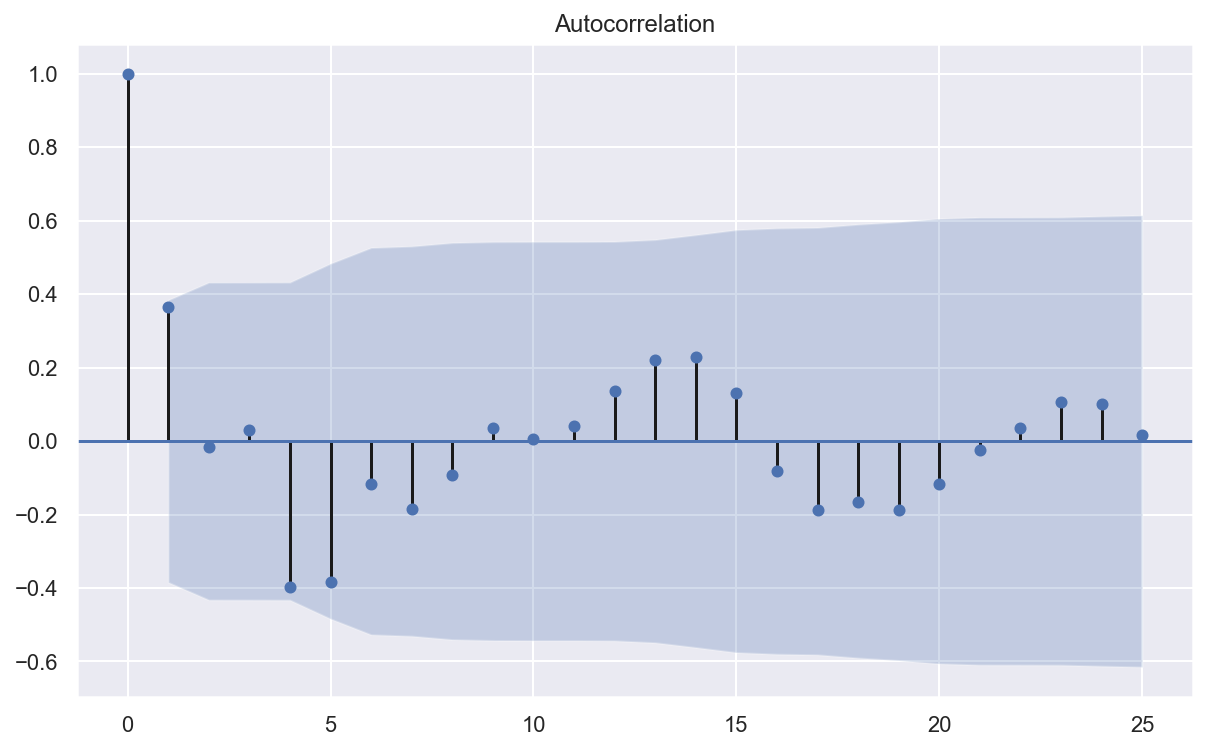

In [49]:
# AutoCorrelation (ACF) plot
acf = sm.graphics.tsa.plot_acf(cabbage_mumbai['arrivals_in_qtl'])

<b>ACF plot: </b>It is merely a bar chart of the coefficients of correlation between a time series and lags(errors) of itself. It help us know <i>How much values in the past are correlated to the present value?</i>

The dark blue region shows the confidence interval. The x- axis shows the Lags and y-axis shows the Correlation. The Lag at 0 shows the present value and Lag at 25 shows the value 25 months later. 

C:\Users\Praneet\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


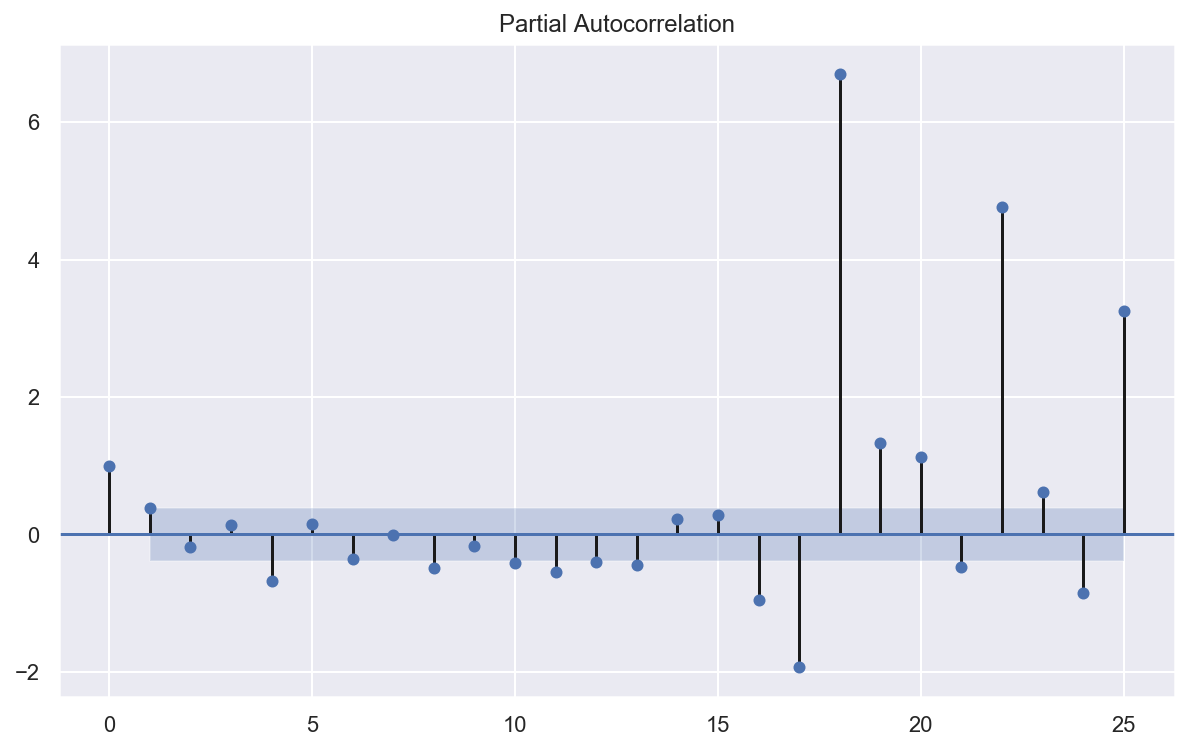

In [50]:
# Partial Auto Correlation (PACF) Plot
pacf = smt.graphics.plot_pacf(cabbage_mumbai['arrivals_in_qtl'])

<b>PACF: </b>It is a plot of the partial correlation coefficients between the series and lags of itself.

Our main focus is on the ```arrivals_in_qtl``` attribute. So let's check out that attribute.

In [51]:
cabbage_mumbai['arrivals_in_qtl'].describe()

count      26.00000
mean    46456.92308
std      9025.39208
min     30990.00000
25%     39265.00000
50%     46260.00000
75%     54045.00000
max     63190.00000
Name: arrivals_in_qtl, dtype: float64

C:\Users\Praneet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


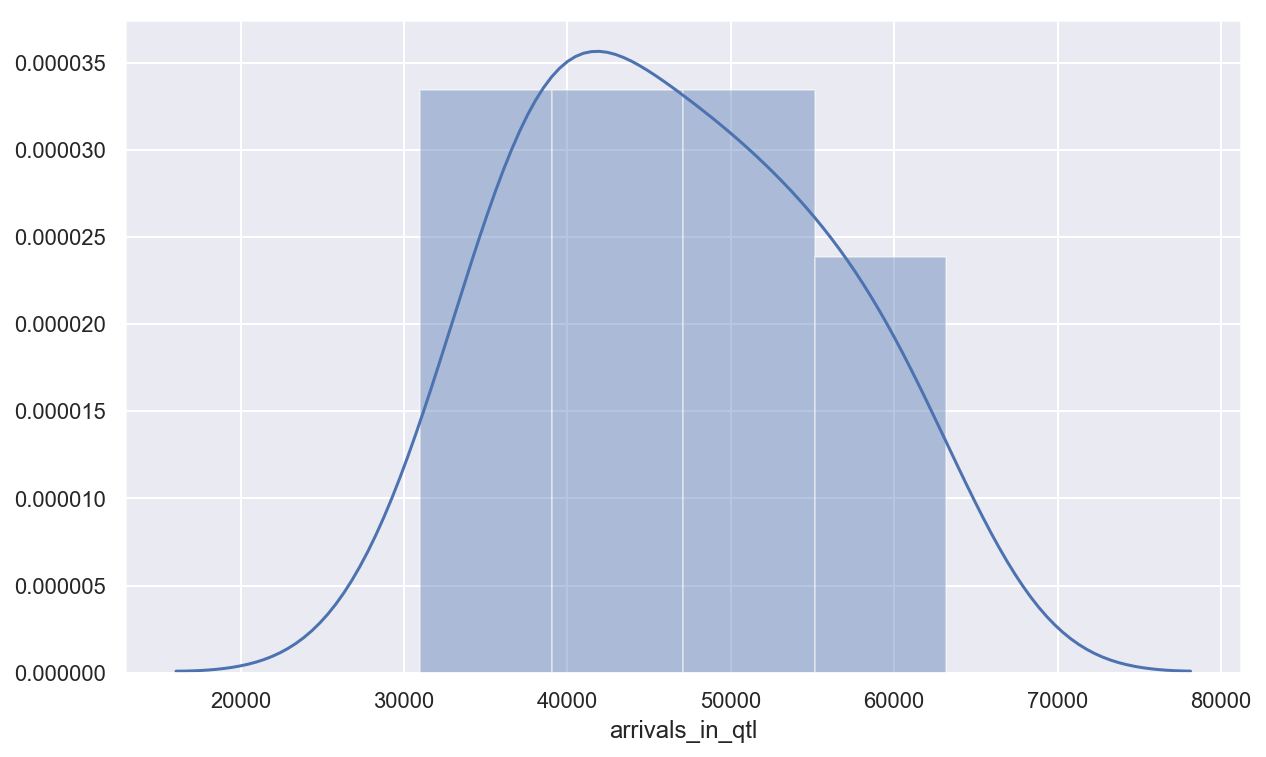

In [52]:
# Visualize 
sns.distplot(cabbage_mumbai['arrivals_in_qtl'])

The above plot shows us the distribution of our data from 30990.0 to 63190.0

In [53]:
# Calculate the Skewness and Kurtosis
print("Skewness: {}".format(cabbage_mumbai['arrivals_in_qtl'].skew()))
print("Kurtosis: {}".format(cabbage_mumbai['arrivals_in_qtl'].kurt()))

Skewness: 0.23009551008833992
Kurtosis: -0.9732740854329998


<i>Skewness</i>: It measures the degree of distortion from the normal distribution curve. A symmetric distribution is having the Skewness value equals to zero (i.e. Mean = Median = Mode).

<b>Key points to note:</b>

- If the skewness value lies between -0.5 to 0.5, then we can say that the data is fairly symmetrical. (That's a good sign) <b>Which is in our case</b>.
- If the skewness value lies between -1 to -0.5 then we can say that the data is negatively skewed. And if the skewness value lies between 0.5 ti 1 then we can say that the data is positively skewed.
- If the value of skewness is less than -1 or greater than 1, then we can say that the data is highly skewed.

<i>Kurtosis</i>: It is used to measure the outliners present in the distortion. I also tell us the height and sharpness of the central peak, relative to that of normal distribution. Kurtosis of normal distribution is 3.

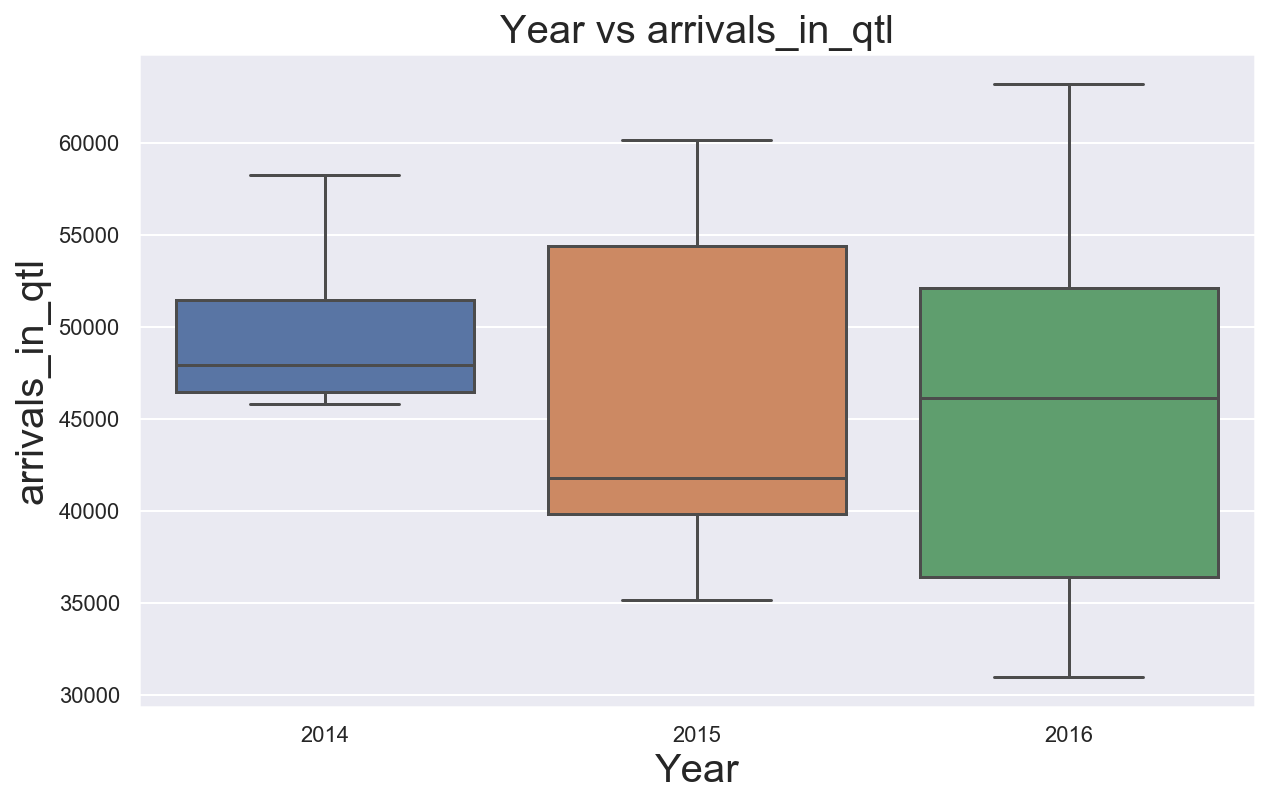

In [54]:
# Visualize the same data using box plot.
# Yearly
ax = (sns.boxplot(x = 'Year', y = 'arrivals_in_qtl', data = cabbage_mumbai))
ax.set_title("Year vs arrivals_in_qtl", fontsize=20)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("arrivals_in_qtl", fontsize=20)

The above box-plot shows the yearly distribution of our cabbage_mumbai dataset. And we can see there are no outliners in our dataset.

<b>Insight: Mumbai - APMC and Cabbage - Commodity</b>
- The median value for ```Quantity arrival in market (in quintal)``` is greater in 2014 then in 2015 and 2016.
- There is a large variation in ```Quantity arrival in market (in quintal)``` in 2016 then in 2015 and 2014.
- The highest and lowest value of ```Quantity arrival in market (in quintal)``` goes in 2016.

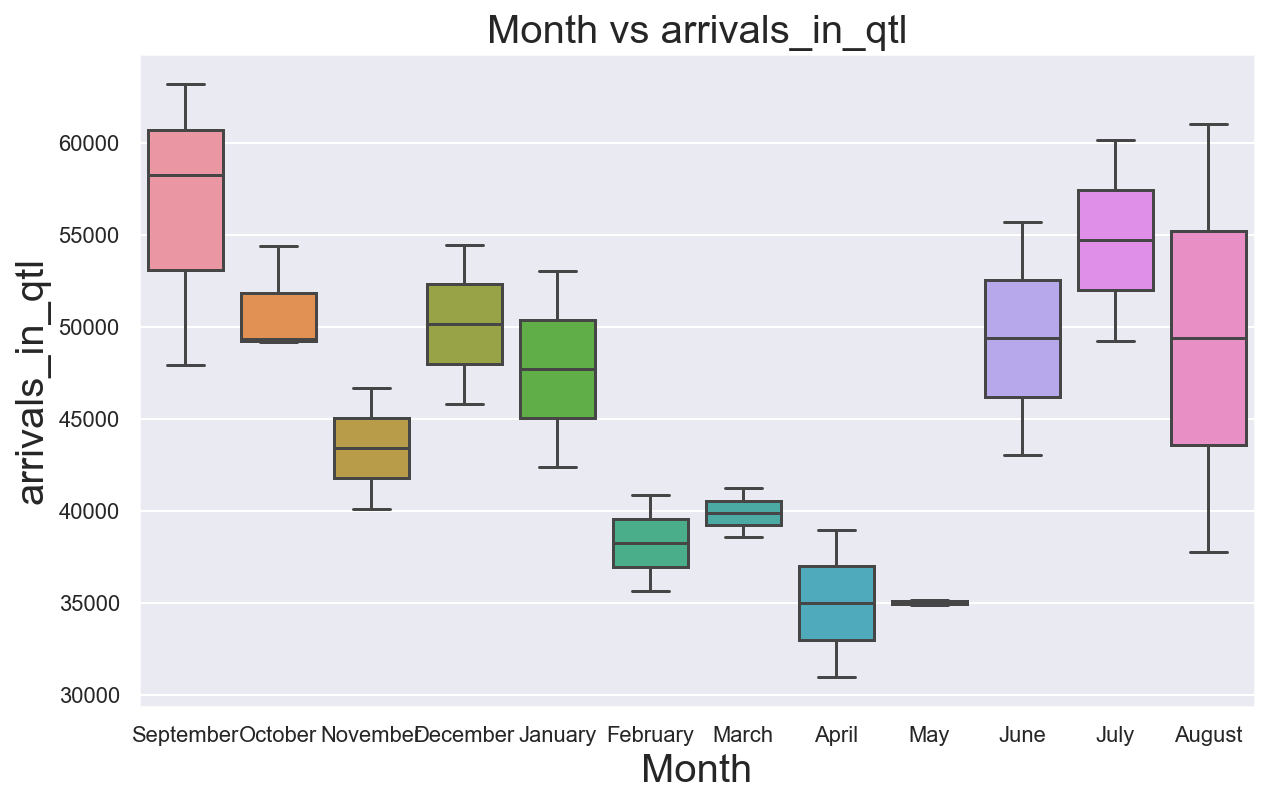

In [55]:
# Monthly
ax = (sns.boxplot(x = 'Month', y = 'arrivals_in_qtl', data = cabbage_mumbai))
ax.set_title("Month vs arrivals_in_qtl", fontsize=20)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("arrivals_in_qtl", fontsize=20)

<b>Insight: Mumbai - APMC and Cabbage - Commodity</b>
- The median value for ```Quantity arrival in market (in quintal)``` is highest in September and lowest in April month. 
- There is a large variation in ```Quantity arrival in market (in quintal)``` during the month of August and small variayion during the month of May or March.
- The highest value of ```Quantity arrival in market (in quintal)``` goes in the month of September and lowest in the month of April.

- <b>Cardamom</b>

Follow the same steps but this time use functions.

In [56]:
def commodity(apmc_name, commodity_name):
    try:
        apmc = cmo_monthly.loc[apmc_name]
        comm = apmc.loc[commodity_name]
        comm = comm.sort_values(by = ['date'])
        comm.set_index('date', inplace = True)
        return comm
        
    except:
        print("APMC name or Commodity name does not match.")
        
    

In [57]:
commodity('Mumbai', 'Cardamom').head()

,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,diff_price
date,,,,,,,,
2014-09-01,2014,September,338,77333,116667,97000,Mumbai,39334
2014-10-01,2014,October,484,80000,124000,96000,Mumbai,44000
2014-11-01,2014,November,506,88000,109231,98615,Mumbai,21231
2014-12-01,2014,December,714,72667,120952,96810,Mumbai,48285
2015-01-01,2015,January,958,70000,120800,95400,Mumbai,50800


In [58]:
# Plot the trend
def trend(apmc_name, commodity_name):
    try:
        return commodity(apmc_name, commodity_name)['arrivals_in_qtl'].plot()
    except:
        print("APMC name or Commodity name does not match.")

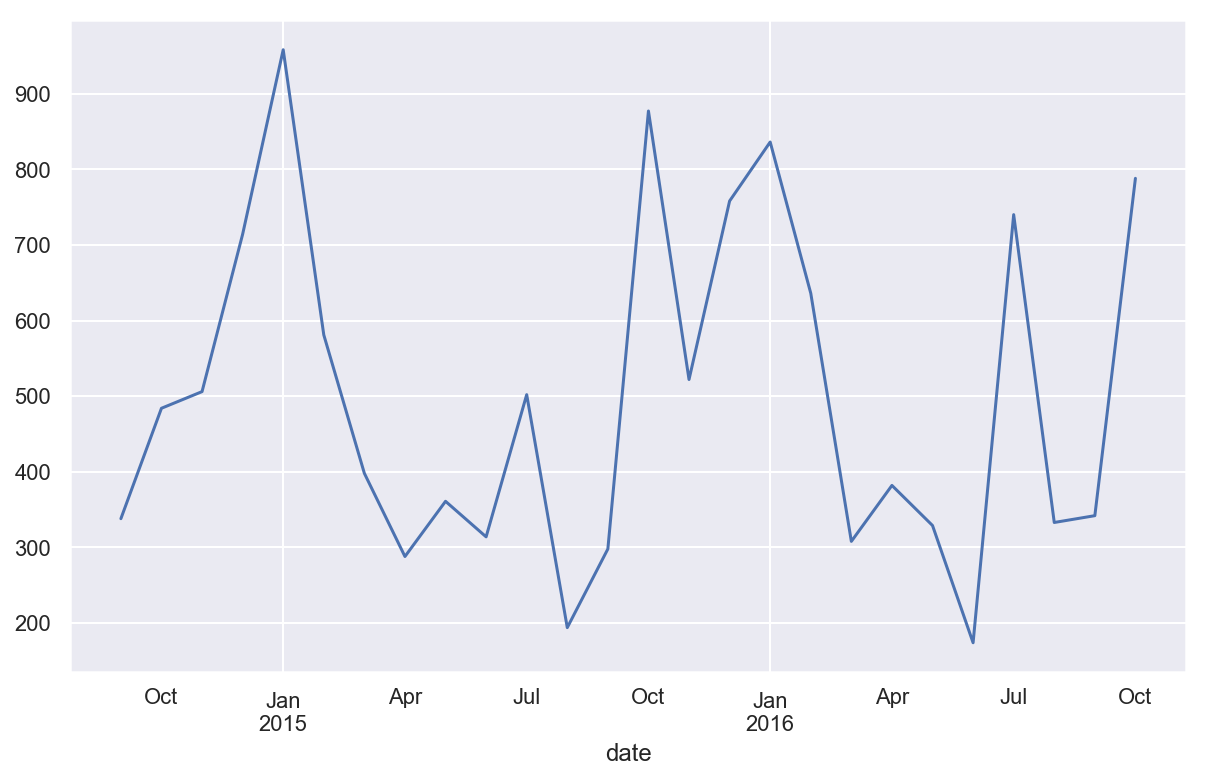

In [59]:
trend('Mumbai', 'Cardamom')

In [60]:
# Plot the Seasonality
def seasonality(apmc_name, commodity_name):
    try:
        return commodity(apmc_name, commodity_name)['arrivals_in_qtl'].diff().plot()
    except:
        print("APMC name or Commodity name does not match.")

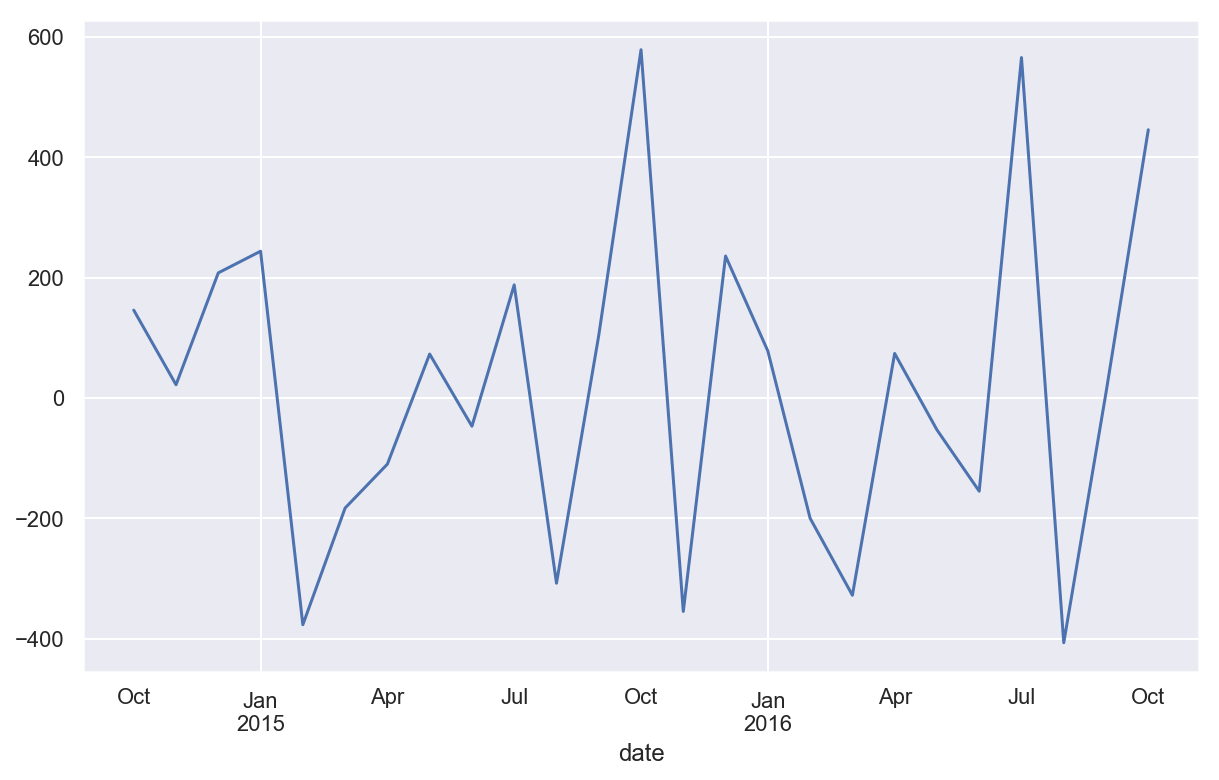

In [61]:
seasonality('Mumbai', 'Cardamom')

In [63]:
def distplot(apmc_name, commodity_name):
    try:
        print("Skewness: {}".format(commodity(apmc_name, commodity_name)['arrivals_in_qtl'].skew()))
        print("Kurtosis: {}".format(commodity(apmc_name, commodity_name)['arrivals_in_qtl'].kurt()))
        return sns.distplot(commodity(apmc_name, commodity_name)['arrivals_in_qtl'])
    except:
        print("APMC name or Commodity name does not match.")

Skewness: 0.5530711249688383
Kurtosis: -0.867303919344466


C:\Users\Praneet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


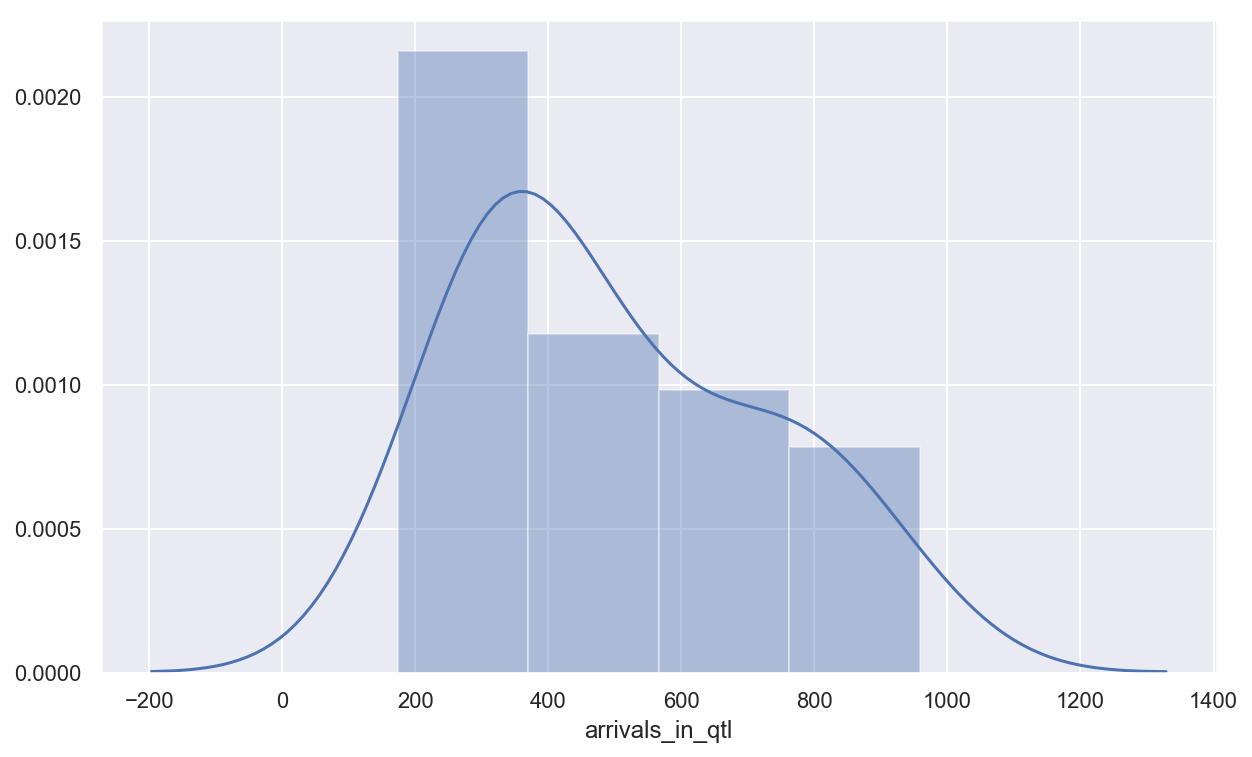

In [64]:
distplot('Mumbai', 'Cardamom')

The value of skewness is in the range of 0.5 to 1.So we can say that our data is positively skewed.

In [65]:
def yearly_boxplot(apmc_name, commodity_name):
    try:
        ax = (sns.boxplot(x = 'Year', y = 'arrivals_in_qtl', data = commodity(apmc_name, commodity_name)))
        ax.set_title("Year vs arrivals_in_qtl", fontsize=20)
        ax.set_xlabel("Year", fontsize=20)
        ax.set_ylabel("arrivals_in_qtl", fontsize=20)
    except:
        print("APMC name or Commodity name does not match.")

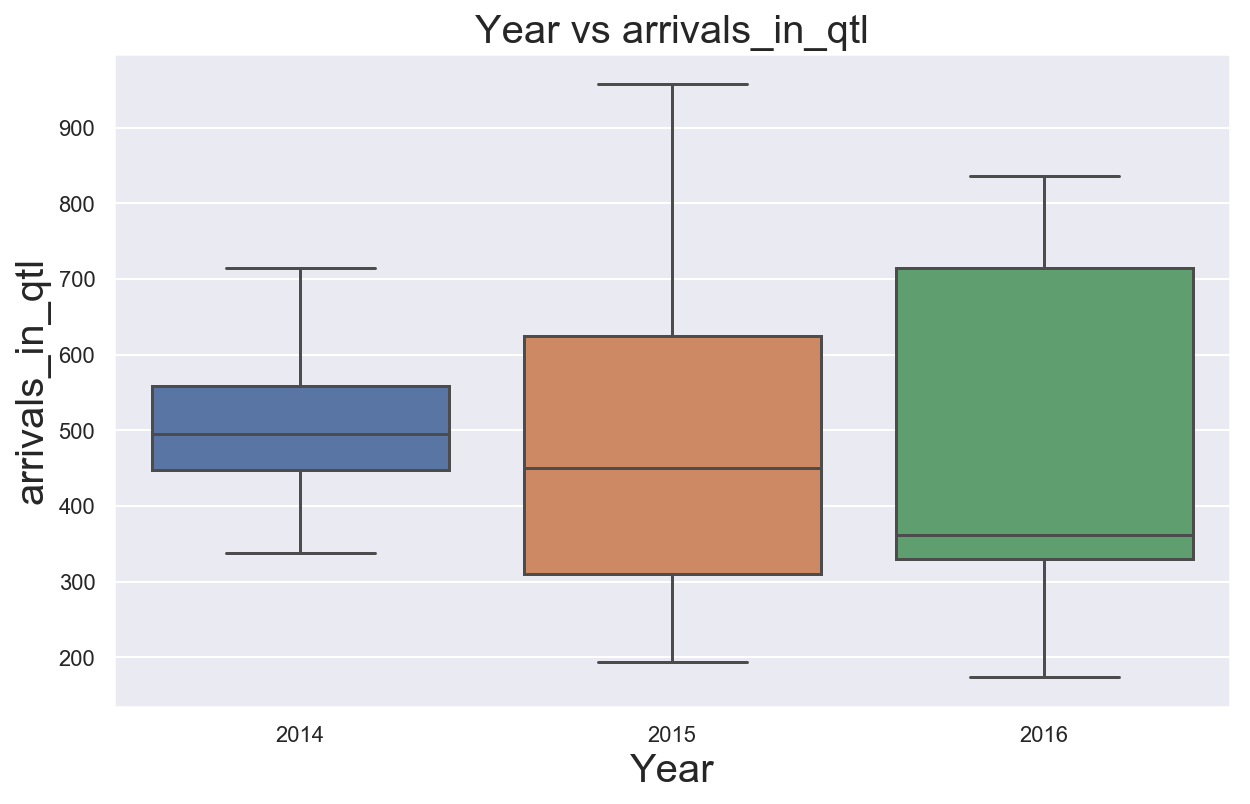

In [66]:
yearly_boxplot('Mumbai', 'Cardamom')

<b>Insight: Mumbai - APMC and Cardamom - Commodity</b>
- The median value for ```Quantity arrival in market (in quintal)``` is decreases from 2014 to 2016.
- There is a large variation in ```Quantity arrival in market (in quintal)``` in 2015.
- The highest value of ```Quantity arrival in market (in quintal)``` goes in 2015 and lowest in 2016.

In [67]:
def monthly_boxplot(apmc_name, commodity_name):
    try:
        ax = (sns.boxplot(x = 'Month', y = 'arrivals_in_qtl', data = commodity(apmc_name, commodity_name)))
        ax.set_title("Month vs arrivals_in_qtl", fontsize=20)
        ax.set_xlabel("Month", fontsize=20)
        ax.set_ylabel("arrivals_in_qtl", fontsize=20)
    except:
        print("APMC name or Commodity name does not match.")

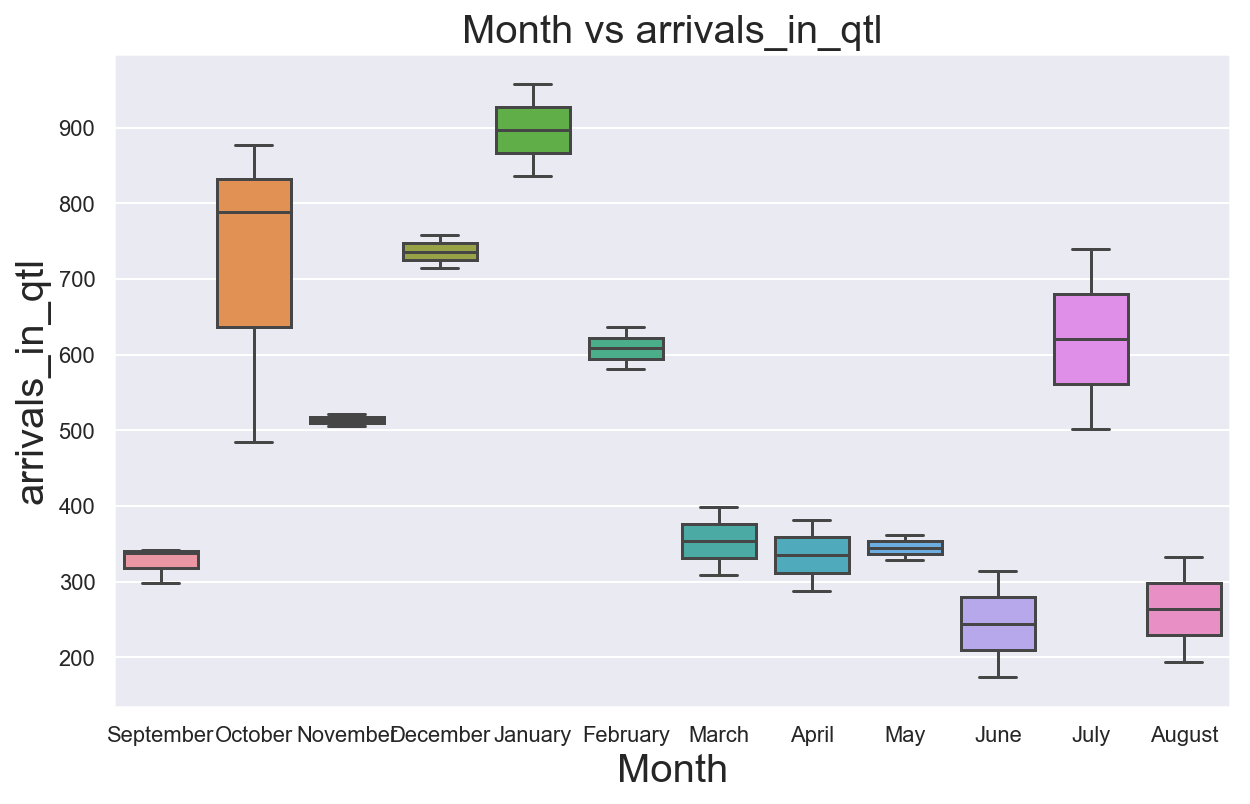

In [68]:
monthly_boxplot('Mumbai', 'Cardamom')

<b>Insight: Mumbai - APMC and Cardamom - Commodity</b>
- The median value for ```Quantity arrival in market (in quintal)``` is highest in January and lowest in June.
- There is a large variation in ```Quantity arrival in market (in quintal)``` in the month of October and small variation in month of November or May.
- The highest value of ```Quantity arrival in market (in quintal)``` goes in the month of January and lowest in month of June.

In [69]:
def acf(apmc_name, commodity_name):
    try:
        acf = sm.graphics.tsa.plot_acf(commodity(apmc_name, commodity_name)['arrivals_in_qtl'])
    except:
        print("APMC name or Commodity name does not match.")

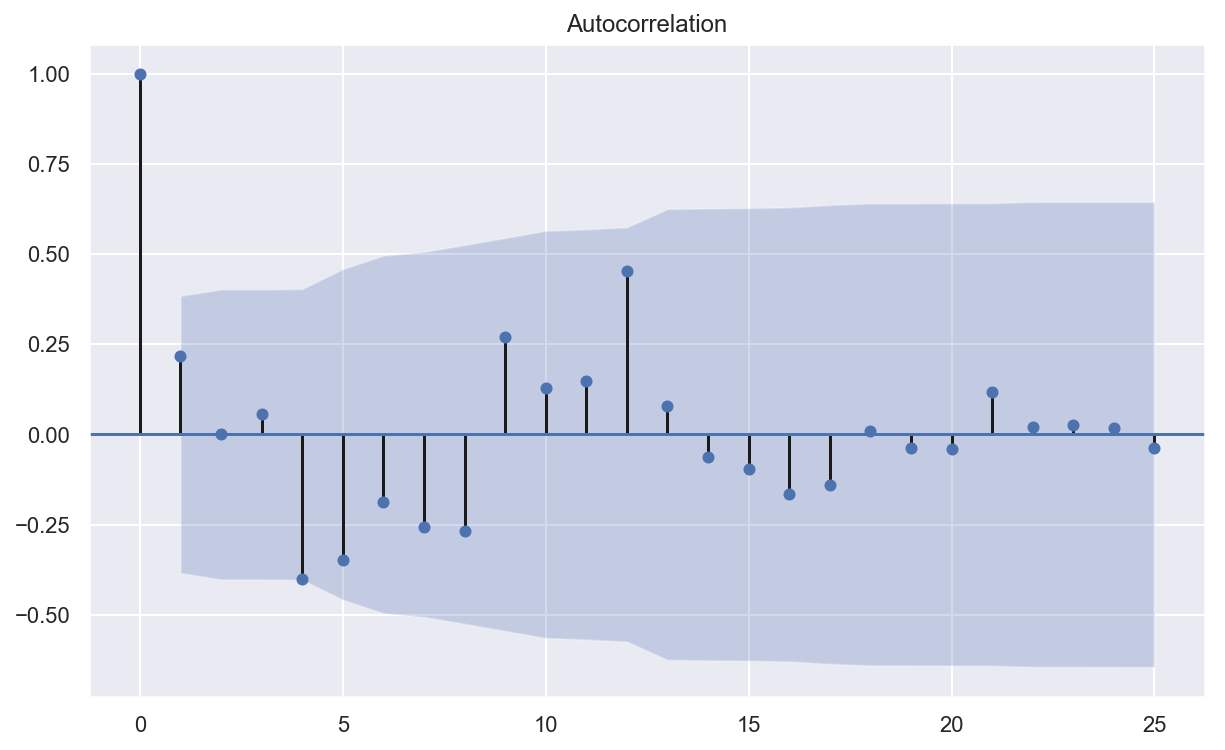

In [70]:
acf('Mumbai', 'Cardamom')

In [71]:
def pacf(apmc_name, commodity_name):
    try:
        pacf = smt.graphics.plot_pacf(commodity(apmc_name, commodity_name)['arrivals_in_qtl'])
    except:
        print("APMC name or Commodity name does not match.")

C:\Users\Praneet\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


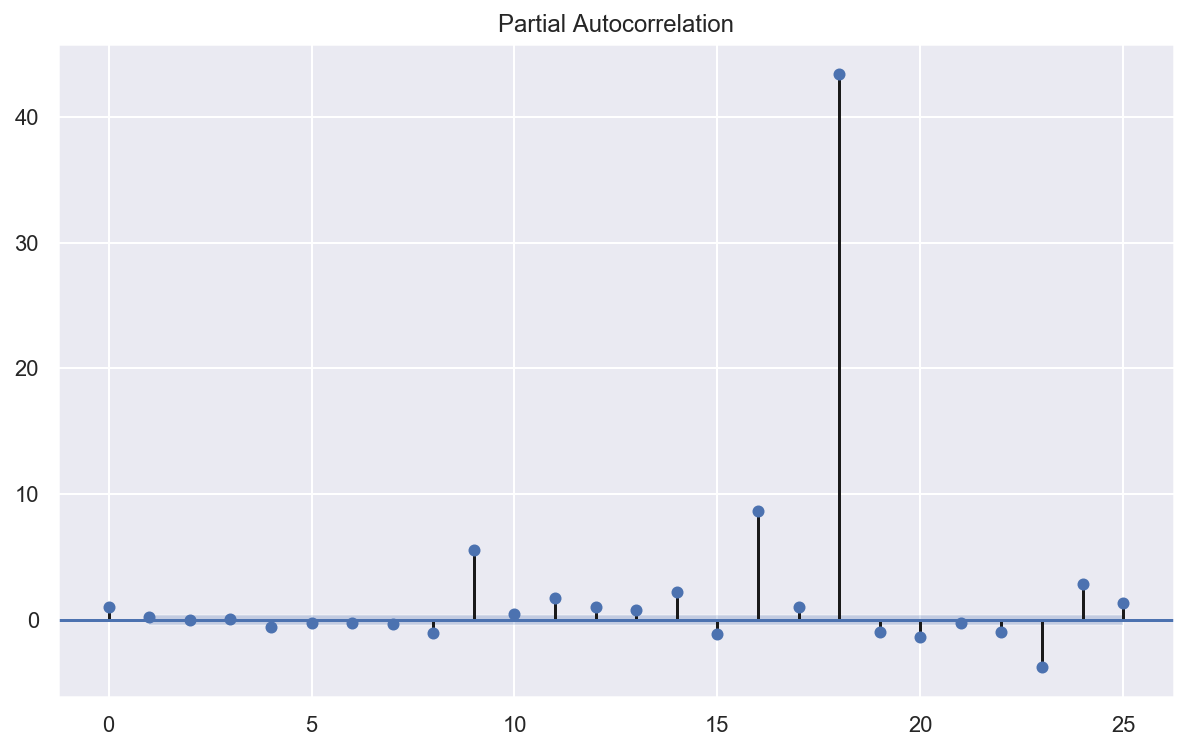

In [72]:
pacf('Mumbai', 'Cardamom')

Now, that we have simply created the functions its easy to analyse other commodities. the steps to analyse them are:
- commodity(apmc_name, commodity_name)
- trend(apmc_name, commodity_name)
- seasonality(apmc_name, commodity_name)
- distplot('Mumbai', 'Cardamom')
- yearly_boxplot(apmc_name, commodity_name)
- monthly_boxplot(apmc_name, commodity_name)
- acf(apmc_name, commodity_name)
- pacf(apmc_name, commodity_name)

- <b>Split Black Gram</b>

Follow the same steps.

In [73]:
commodity('Mumbai', 'Spilt Gerrn Gram').head()

,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,diff_price
date,,,,,,,,
2014-09-01,2014,September,12120,8016,9247,8478,Mumbai,1231
2014-10-01,2014,October,21232,8000,9058,8379,Mumbai,1058
2014-11-01,2014,November,29289,8028,9028,8370,Mumbai,1000
2014-12-01,2014,December,26850,8207,9207,8507,Mumbai,1000
2015-01-01,2015,January,22772,8508,9508,8808,Mumbai,1000


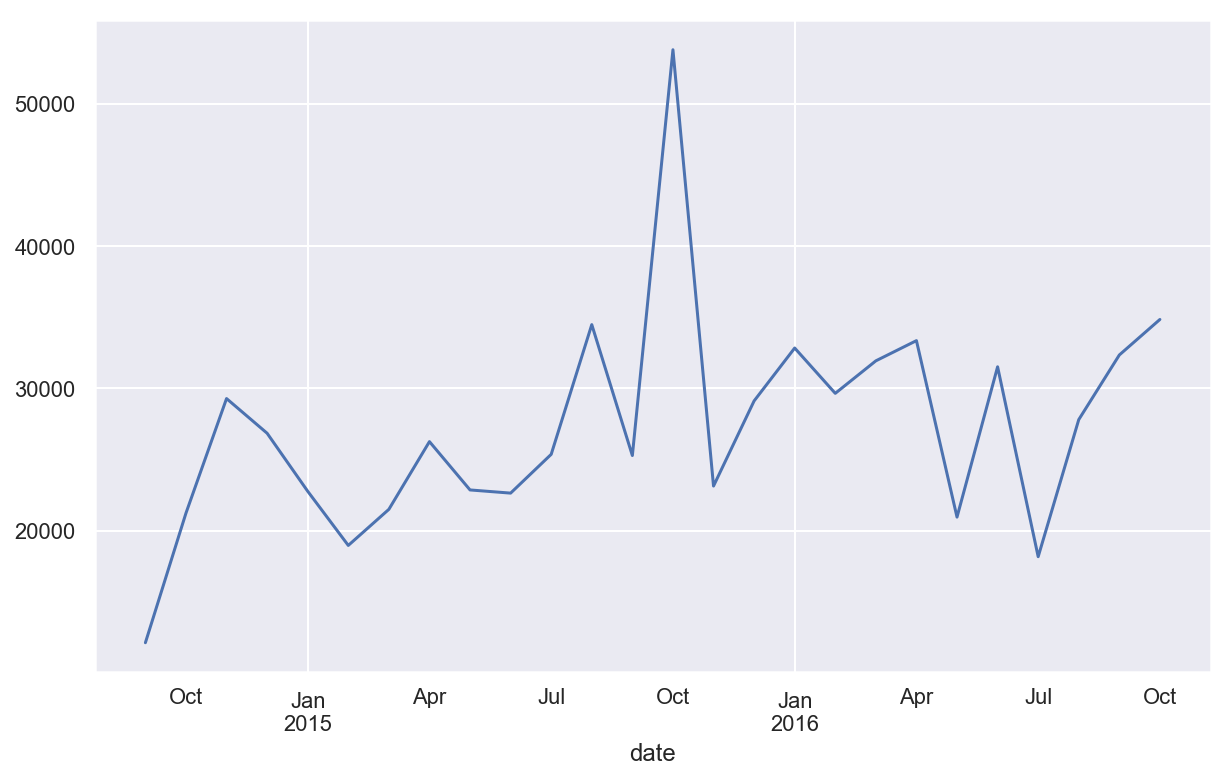

In [74]:
trend('Mumbai', 'Spilt Gerrn Gram')

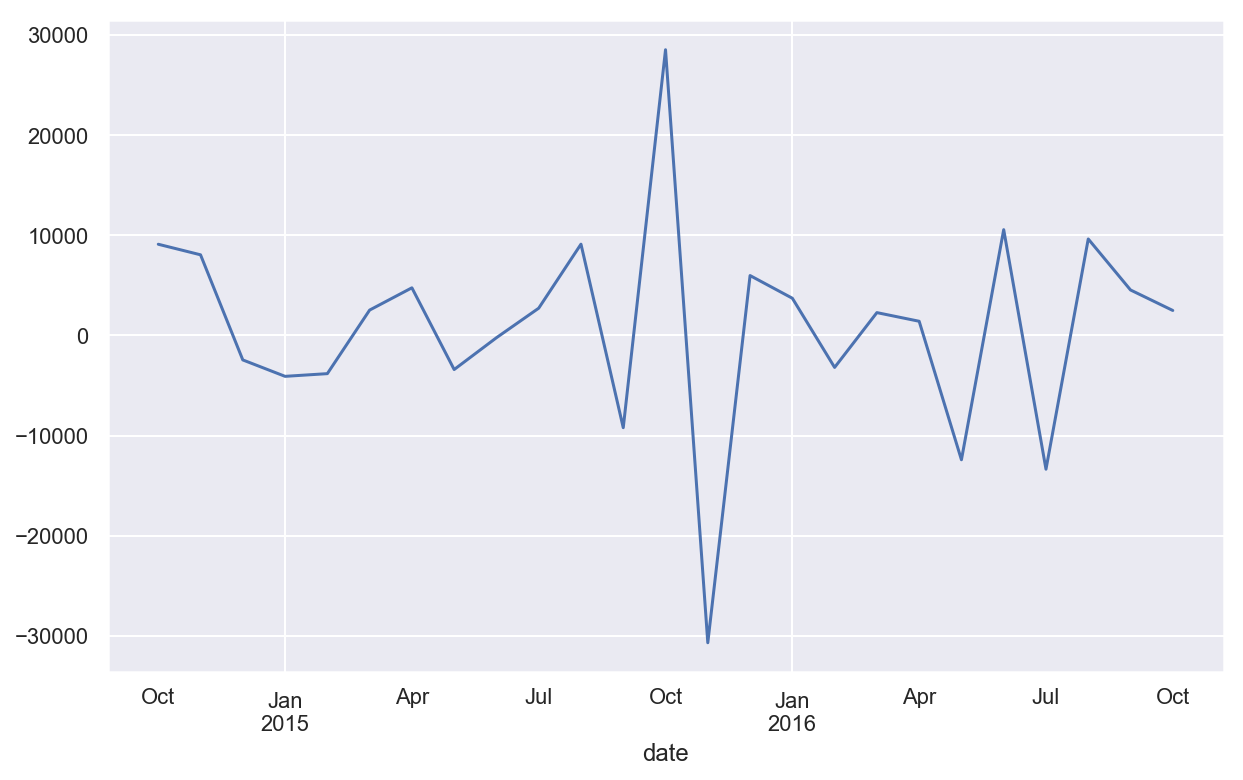

In [75]:
seasonality('Mumbai', 'Spilt Gerrn Gram')

Skewness: 1.2911430036695306
Kurtosis: 4.330030045397871


C:\Users\Praneet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


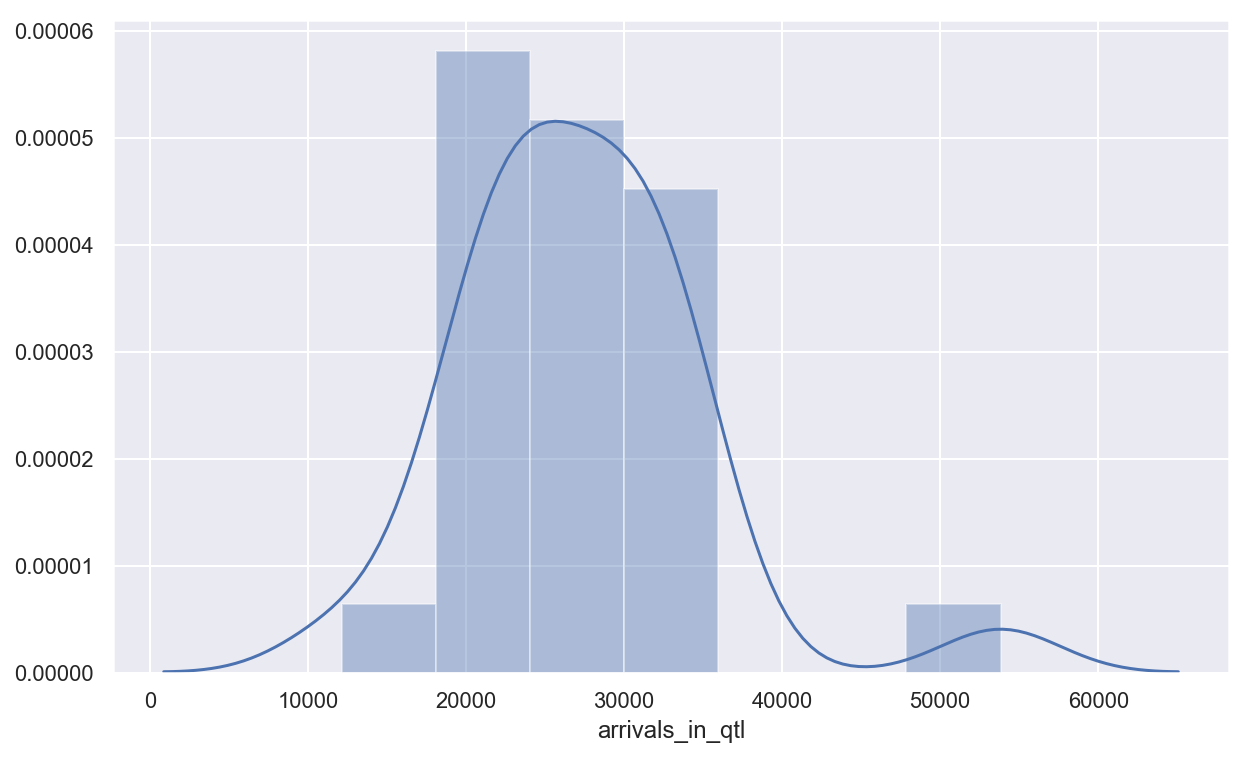

In [76]:
distplot('Mumbai', 'Spilt Gerrn Gram')

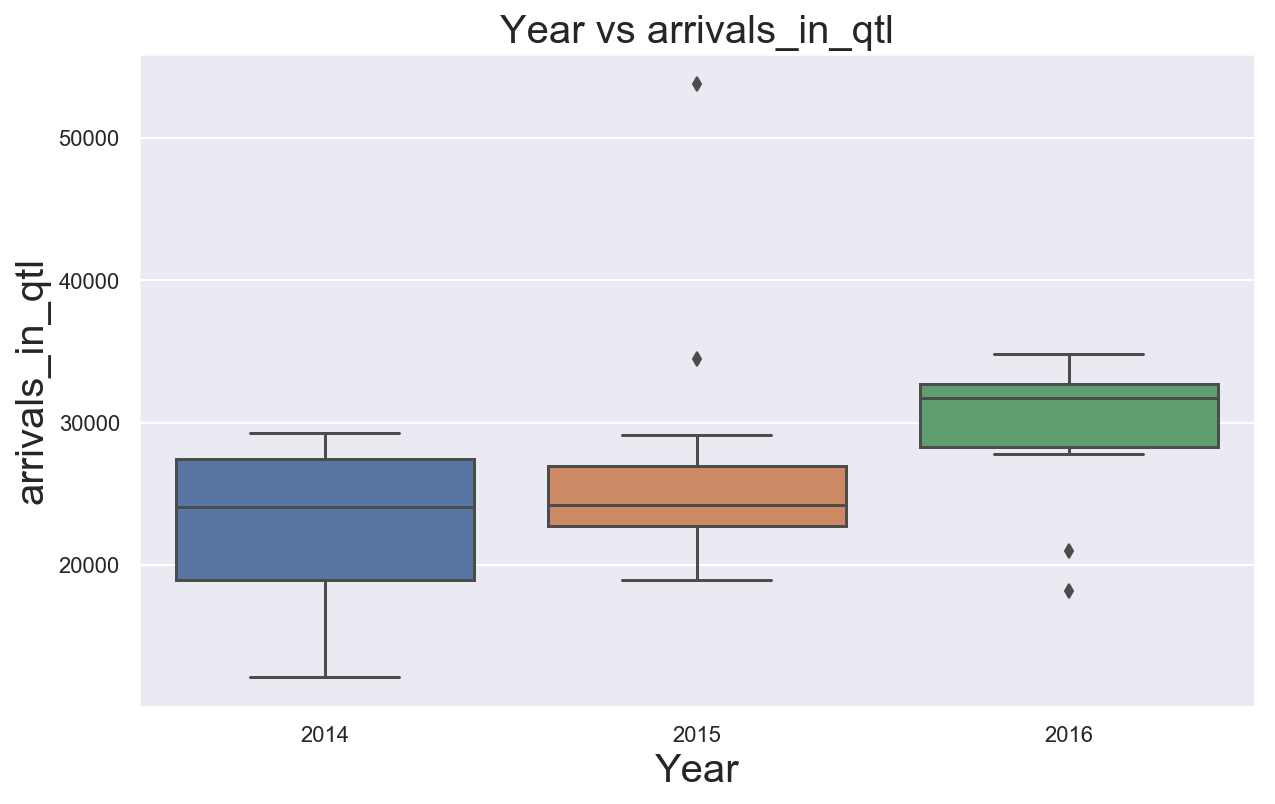

In [77]:
yearly_boxplot('Mumbai', 'Spilt Gerrn Gram')

Detected outliners in 2015 and 2016.

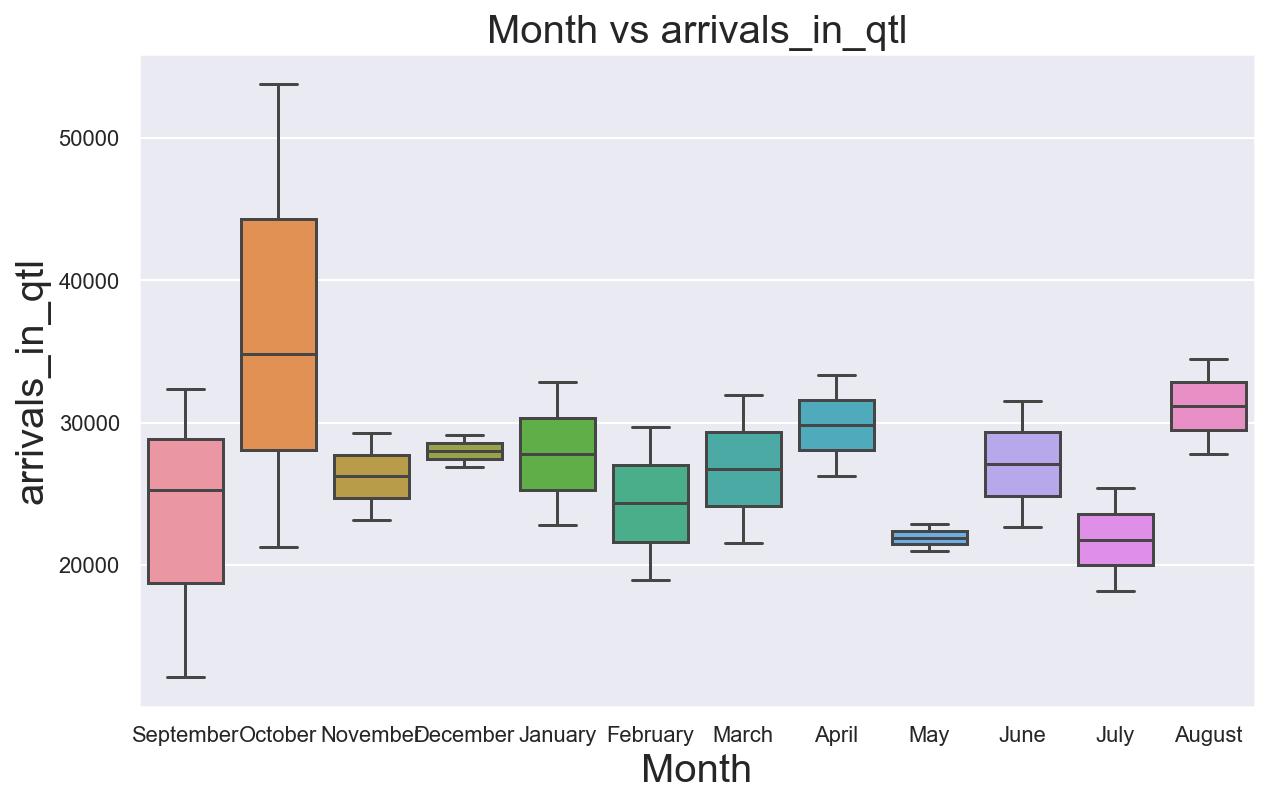

In [78]:
monthly_boxplot('Mumbai', 'Spilt Gerrn Gram')

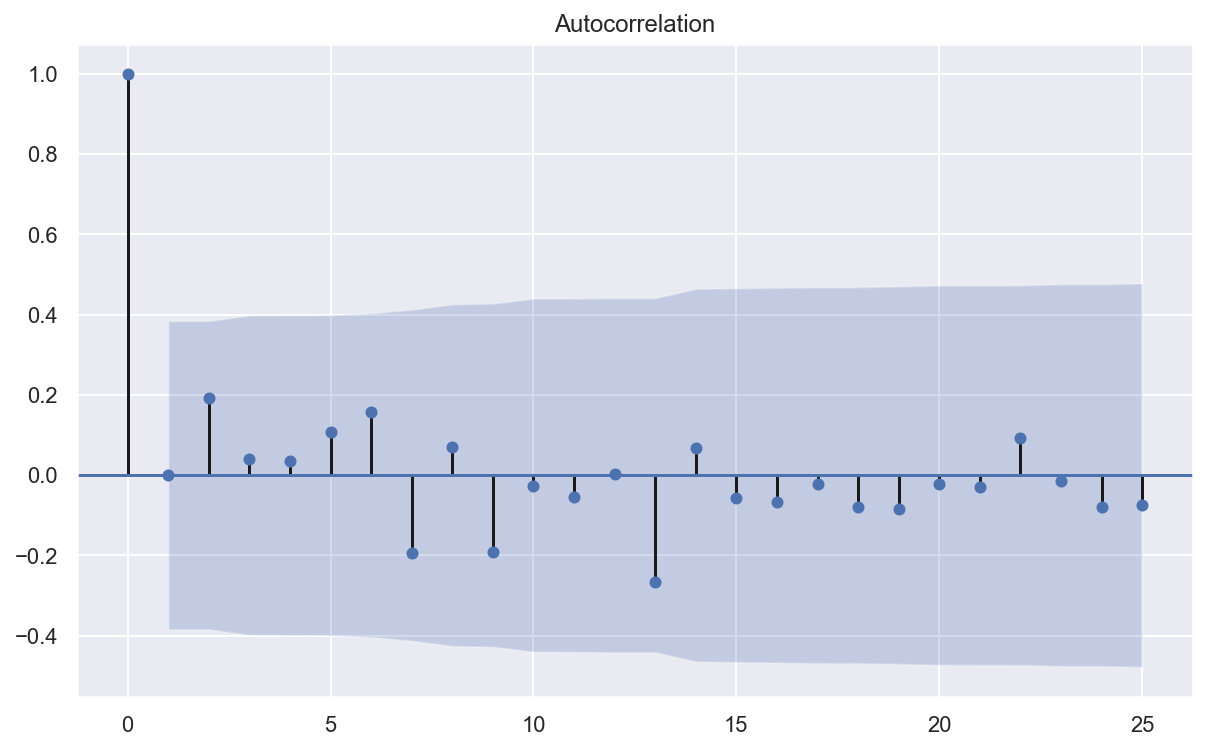

In [80]:
acf('Mumbai', 'Spilt Gerrn Gram')

C:\Users\Praneet\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


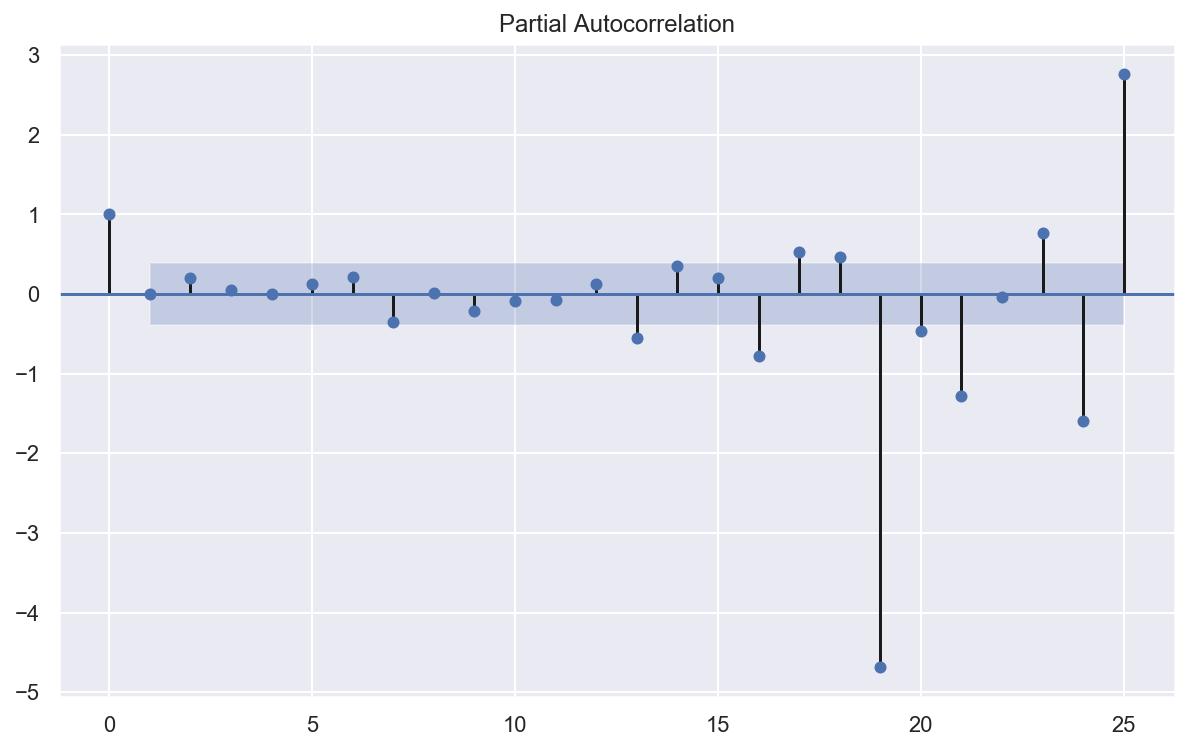

In [81]:
pacf('Mumbai', 'Spilt Gerrn Gram')

### 5. Let's Check Out some random APMC and Commodities.

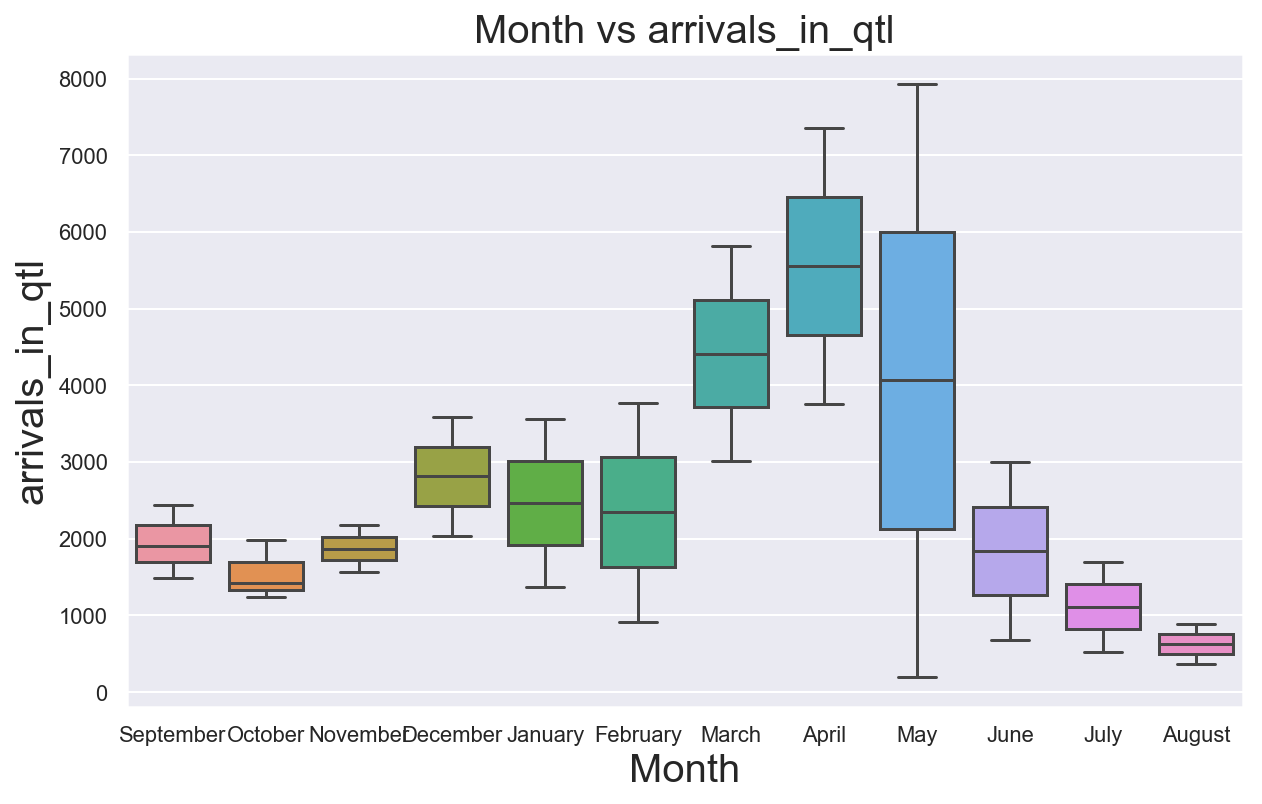

In [82]:
# Monthly variation
monthly_boxplot('Mumbai', 'Tamarind')

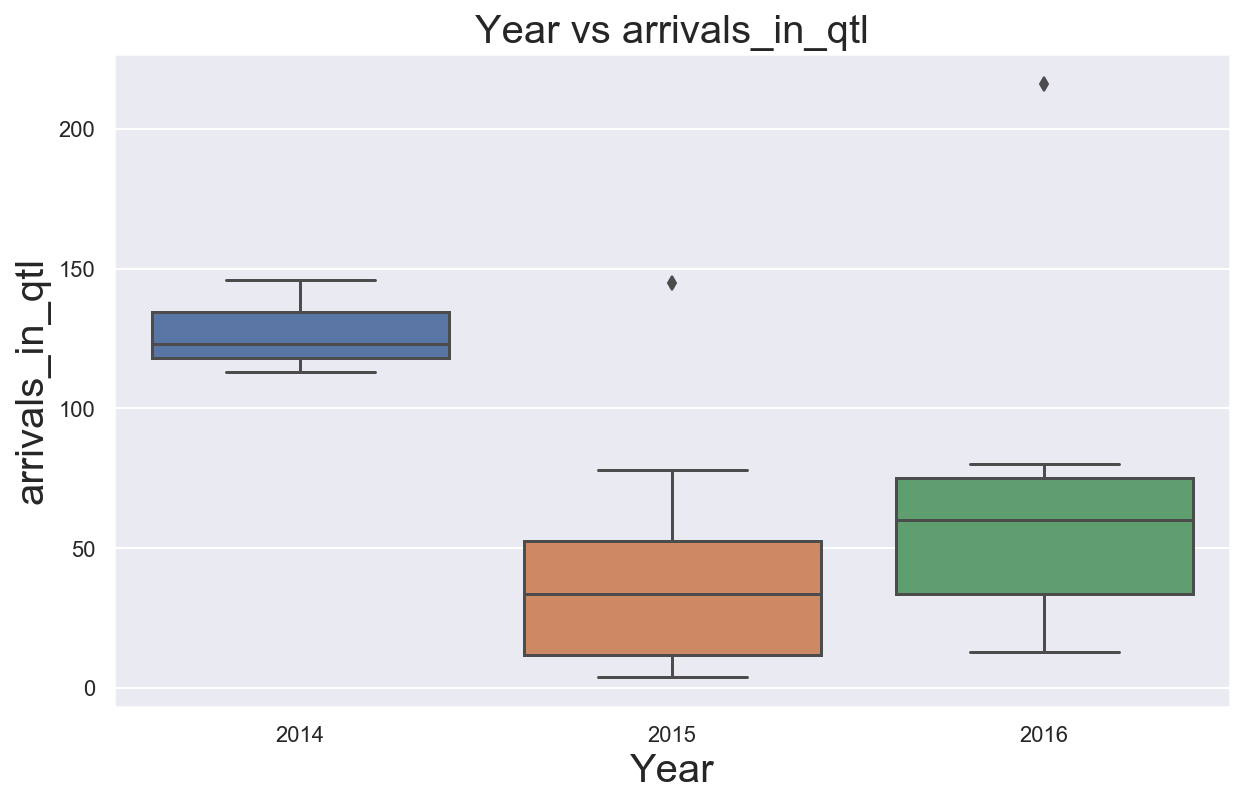

In [83]:
# Yearly boxplot
yearly_boxplot('Loha', 'Wheat(Husked)')

<b>Now, you can easily analyze the data using below functions: </b>
- commodity(apmc_name, commodity_name)
- trend(apmc_name, commodity_name)
- seasonality(apmc_name, commodity_name)
- distplot('Mumbai', 'Cardamom')
- yearly_boxplot(apmc_name, commodity_name)
- monthly_boxplot(apmc_name, commodity_name)
- acf(apmc_name, commodity_name)
- pacf(apmc_name, commodity_name)

As all APMC does not contain all Commodities. Hence, in case if APMC doest not have your input commodity name or vice versa it will show us the result: <i>APMC name or Commodity name does not match.</i>